# Importing packages and loading data

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn import svm



# from sklearn.experimental import enable_iterative_imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.metrics import classification_report

# Validating the algorithm using various Performance metrics
from sklearn.metrics import  f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score



from scipy.stats import boxcox


# Data Collection

### Data used: HMEQ(Home Equity) Dataset

In [83]:
## loading the Home Equity dataset to pandas dataframe
df = pd.read_csv('hmeq (1).csv')

In [5]:
# printing the first 5 rows of the dataset
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


### Data Exploration


In [6]:
# number of rows and columns in the dataset
df.shape

(5960, 13)

In [7]:
# Displaying summary information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [8]:
# getting the statistical measure of data
df.describe(include = 'all')

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5708,5681,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
unique,NaN,NaN,NaN,NaN,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,DebtCon,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,3928,2388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.199497,18607.969799,73760.817200,101776.048741,NaN,NaN,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,NaN,NaN,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,NaN,NaN,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,NaN,NaN,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,NaN,NaN,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141


In [9]:
# Count the number of missing values in each column
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [10]:
# Checking duplicate values
df.duplicated().sum()

0

### Missing Values:
Several columns have missing values, as indicated by the difference between the "Non-Null Count" and the total number of entries (5,960):
-> 'MORTDUE' has missing values for 518 entries.

-> 'VALUE' has missing values for 112 entries.

-> 'REASON' has missing values for 252 entries.

-> 'JOB' has missing values for 279 entries.

-> 'YOJ' has missing values for 515 entries.

-> 'DEROG' has missing values for 708 entries.

-> 'DELINQ' has missing values for 580 entries.

-> 'CLAGE' has missing values for 308 entries.

-> 'NINQ' has missing values for 510 entries.

-> 'CLNO' has missing values for 222 entries.

-> 'DEBTINC' has missing values for 1,267 entries.

# Exploratory Data Analysis(EDA)

The percentage of defaulters in the data is 19.949664429530202 %


[]

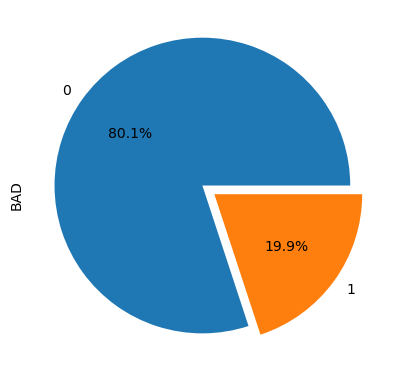

In [11]:
# How many defaulters
perc_default = df.BAD.sum() / len(df.BAD)
print(f'The percentage of defaulters in the data is {perc_default*100} %')
df['BAD'].value_counts().plot(kind='pie',explode=[0.1,0],autopct="%1.1f%%")
plt.plot()

->  Approximately 20% of the clients in the dataset have defaulted on their loans (BAD=1).

->  Around 80% of the clients have successfully repaid their loans or have not defaulted (BAD=0).

REASON
           Value  Count  Percentage
DebtCon  DebtCon   3928   65.906040
HomeImp  HomeImp   1780   29.865772
--------------------------


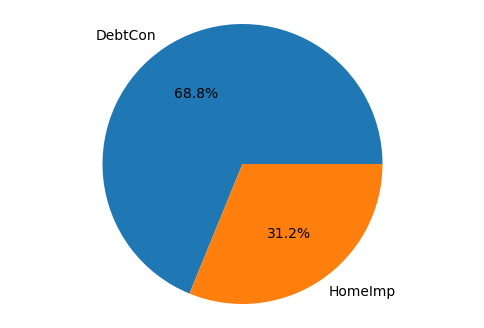

JOB
           Value  Count  Percentage
Mgr          Mgr    767   12.869128
Office    Office    948   15.906040
Other      Other   2388   40.067114
ProfExe  ProfExe   1276   21.409396
Sales      Sales    109    1.828859
Self        Self    193    3.238255
--------------------------


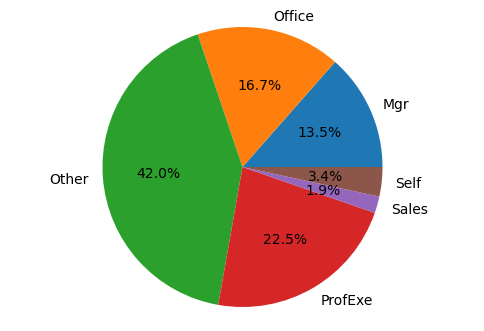

In [12]:
def show_value_counts(col):
    print(col)
    value_counts = df[col].value_counts()
    percentage = value_counts / len(df) * 100
    result_df = pd.DataFrame({'Value': value_counts.index, 'Count': value_counts, 'Percentage': percentage})
    result_df = result_df.sort_values(by='Value')
    print(result_df)
    print('--------------------------')
    generate_pie_plot(result_df)
    
    
def generate_pie_plot(data_frame):
    plt.figure(figsize=(6, 4))
    plt.pie(data_frame['Count'], labels=data_frame['Value'], autopct='%1.1f%%')
    plt.axis('equal')
    plt.show()
    

show_value_counts('REASON')
show_value_counts('JOB')

-> Majority of clients (around 69.8%) have taken out loans for debt consolidation (DebtCon), indicating a higher frequency.

-> Smaller portion of clients (around 30.2%) have taken out loans for home improvement purposes (HomeImp).

-> Largest job category is "Other," accounting for around 42.1% of the clients. This category likely includes diverse job roles not covered by the specific categories.

-> Next most common job category is "ProfExe" (Professional/Executive), representing approximately 21.4% of the clients.

-> "Office" job category constitutes around 15.8% of clients.

-> "Mgr" (Manager), "Self" (Self-Employed), and "Sales" job categories have relatively smaller representations, with approximately 12.9%, 3.2%, and 1.8% of clients, respectively.


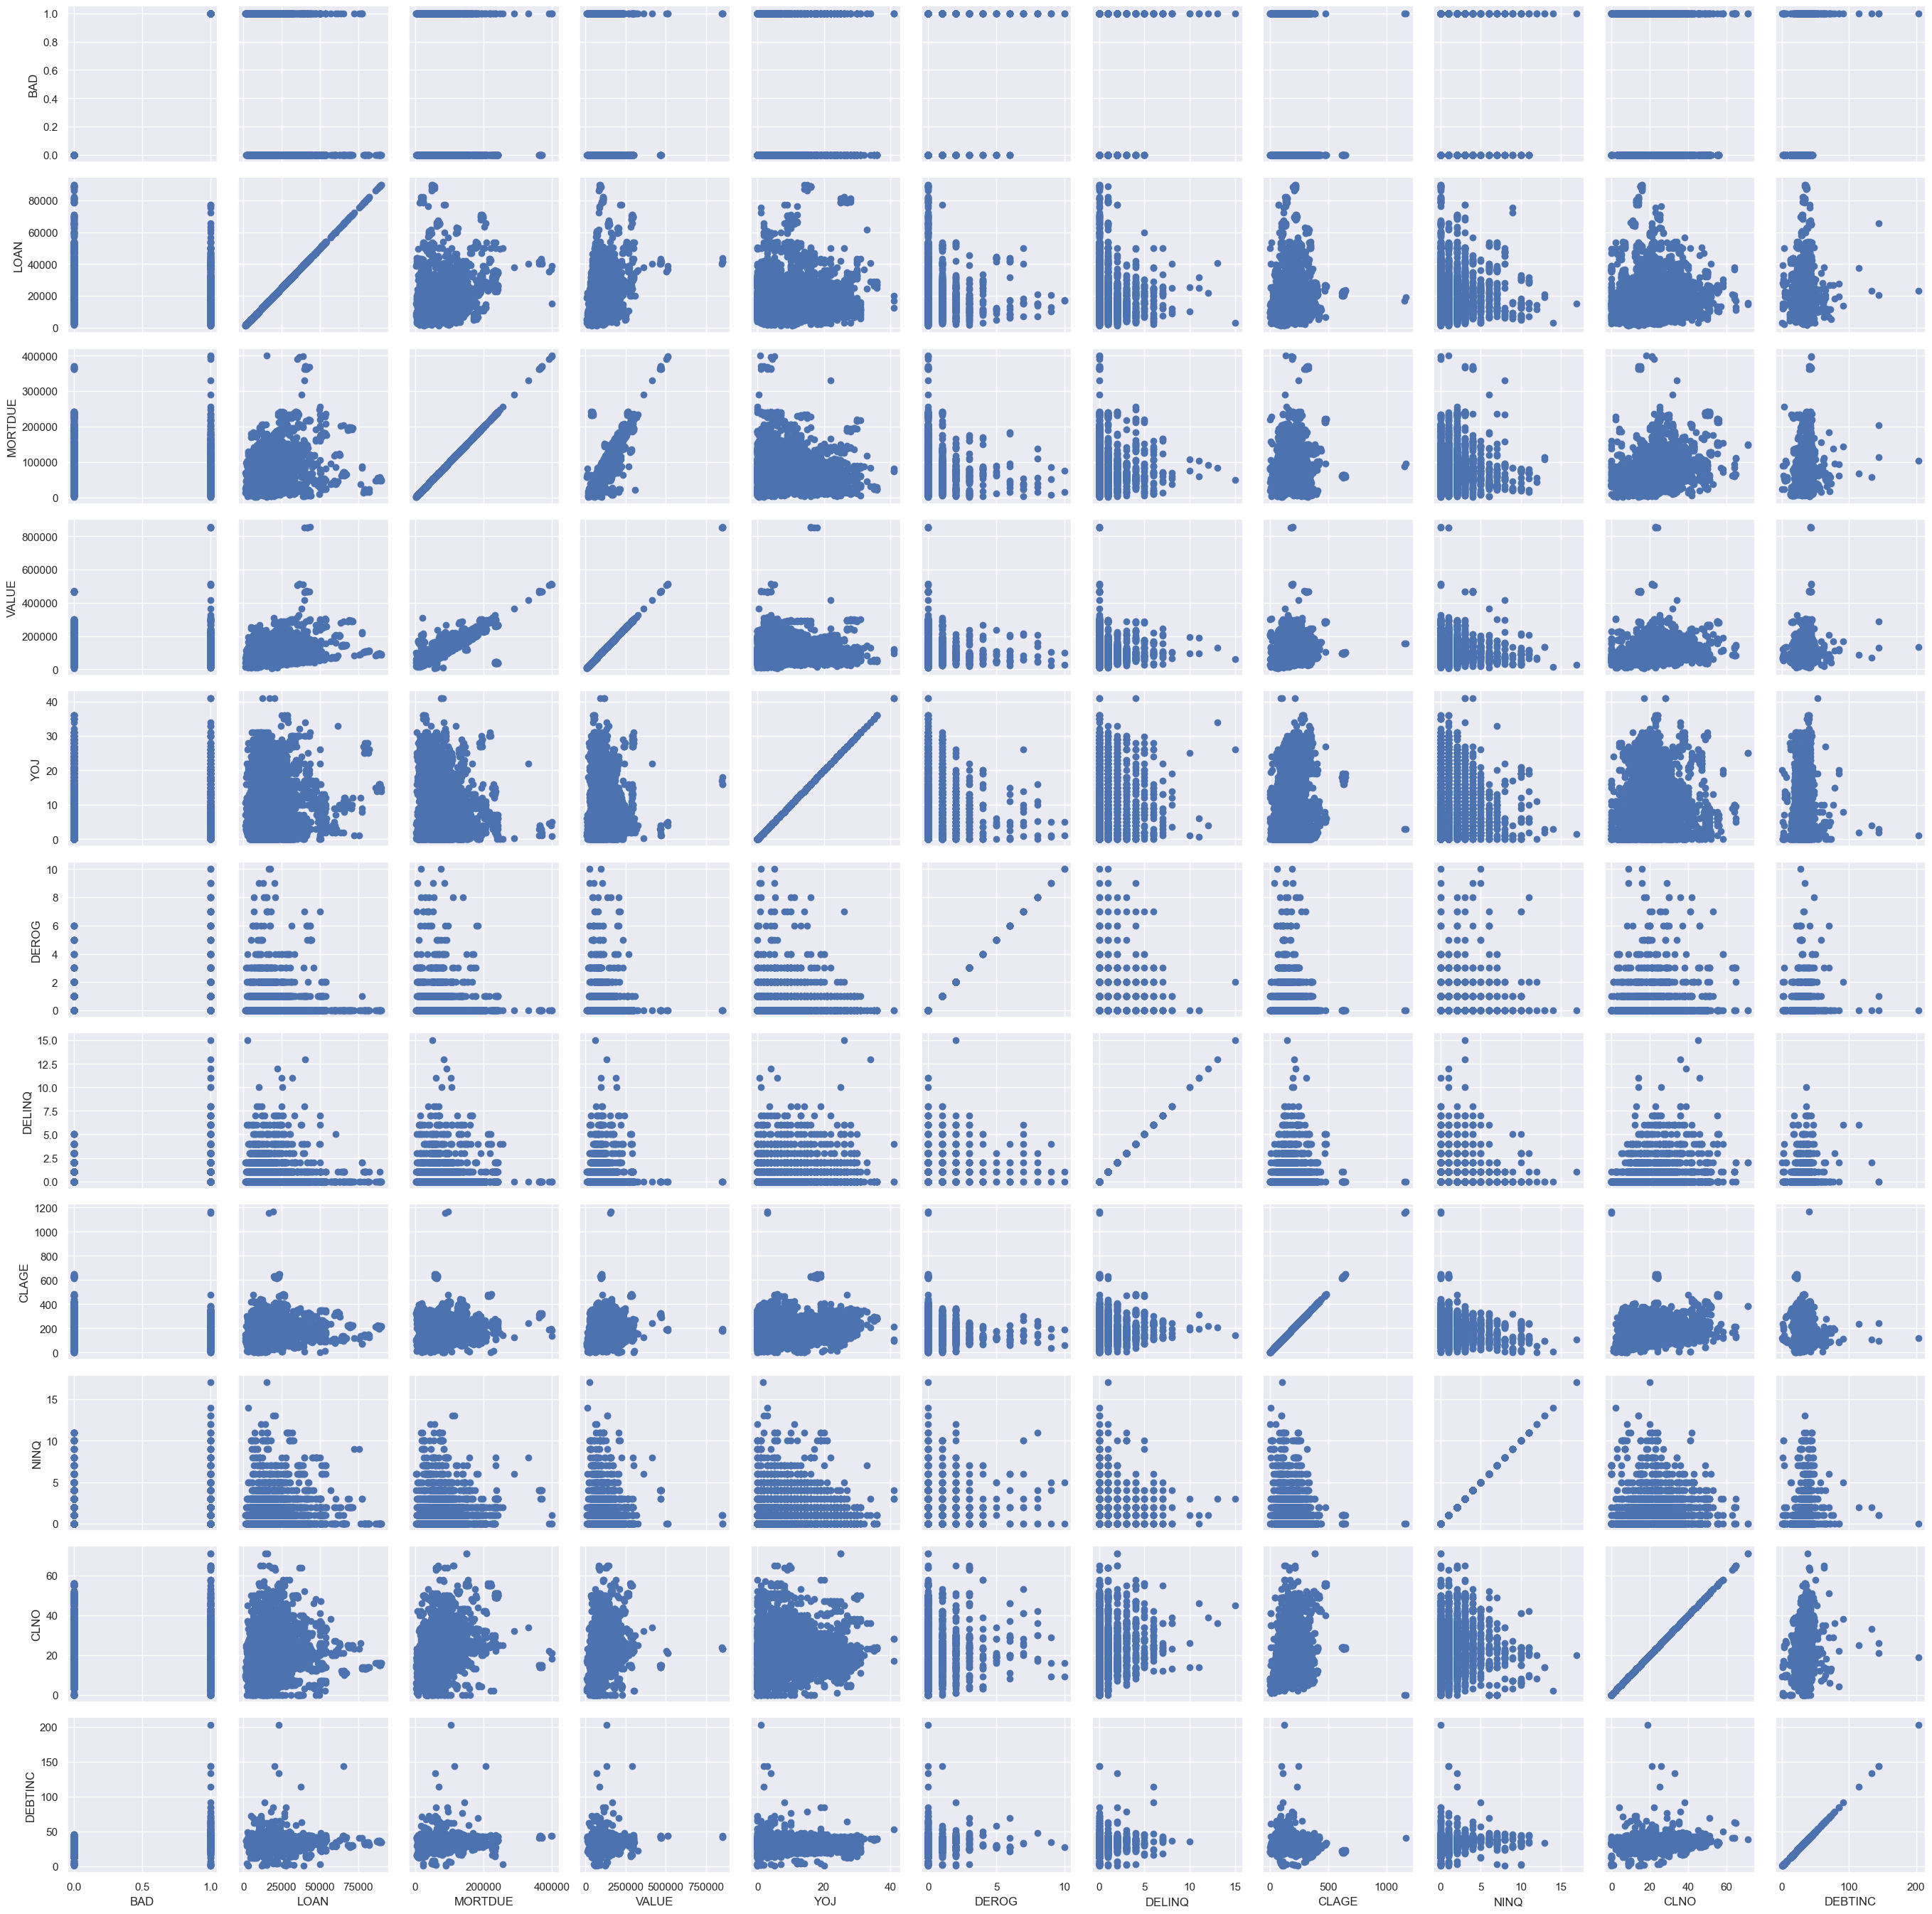

In [13]:
# scatterplot
sns.set(style='darkgrid')
species_col = sns.PairGrid(df)
species_col.map(plt.scatter)

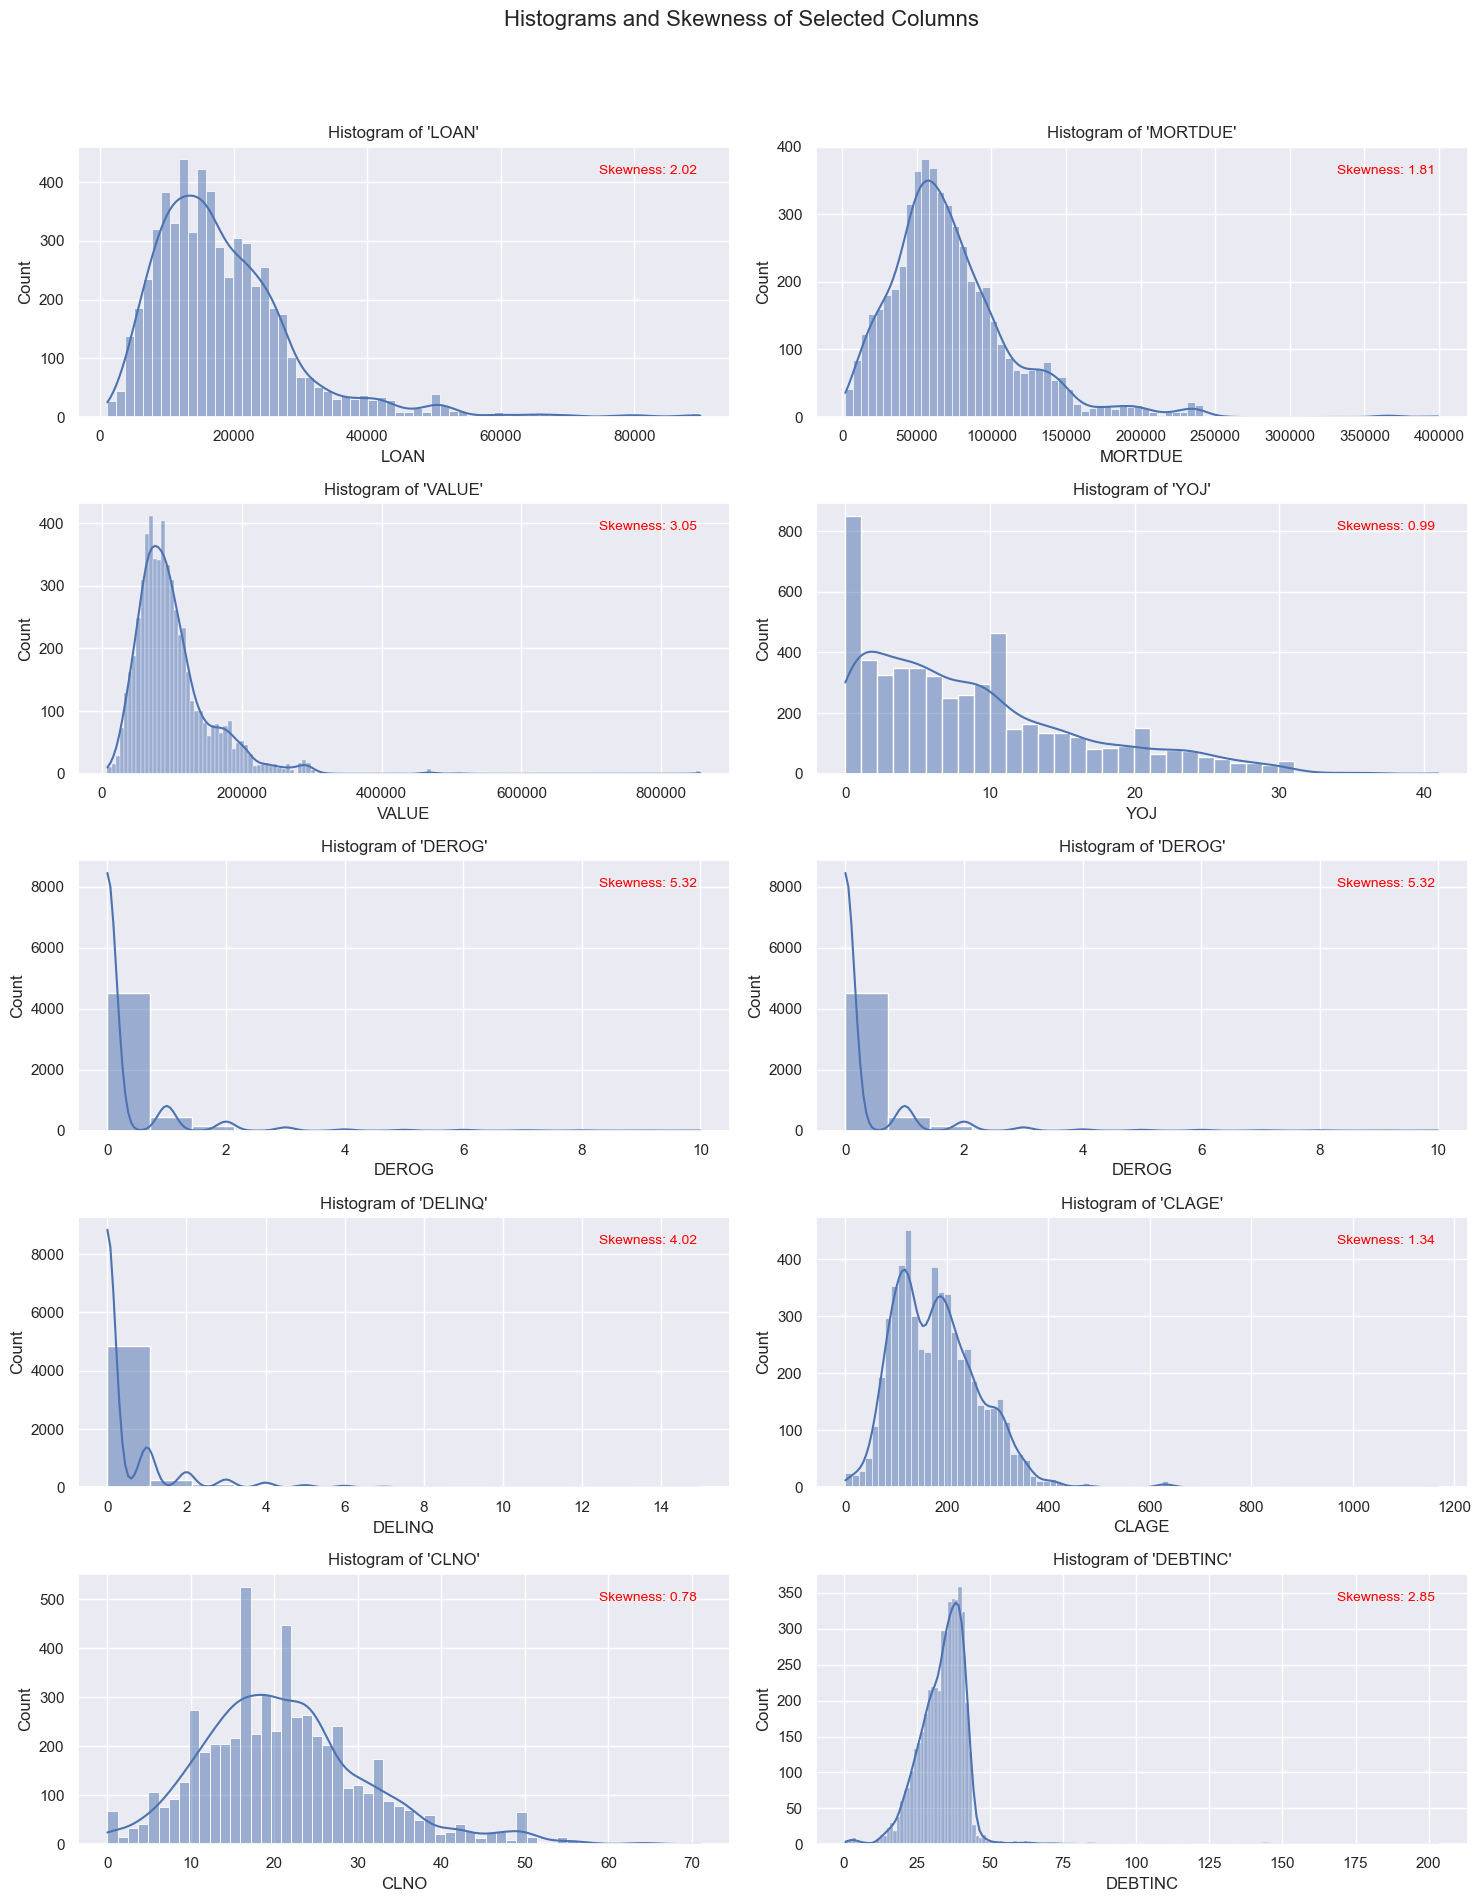

In [84]:
### # Select the columns to check for skewness
columns_to_check = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ','DEROG','DEROG','DELINQ','CLAGE', 'CLNO', 'DEBTINC']

# Create subplots for histograms
num_columns = len(columns_to_check)
num_rows = (num_columns + 1) // 2  # Calculate the number of subplot rows

fig, axes = plt.subplots(num_rows, 2, figsize=(15, 4 * num_rows))
fig.suptitle("Histograms and Skewness of Selected Columns", fontsize=16)

for idx, column in enumerate(columns_to_check):
    row_idx = idx // 2
    col_idx = idx % 2

    # Plot histogram
    sns.histplot(df[column], ax=axes[row_idx, col_idx], kde=True)
    axes[row_idx, col_idx].set_title(f"Histogram of '{column}'")

    # Calculate skewness
    skew_value = df[column].skew()
    axes[row_idx, col_idx].text(0.95, 0.9, f"Skewness: {skew_value:.2f}", transform=axes[row_idx, col_idx].transAxes,
                                horizontalalignment='right', fontsize=10, color='red')

# Adjust layout and display plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Default rate by number of credit lines

Text(0.5, 1.0, 'Default rate by number of credit lines')

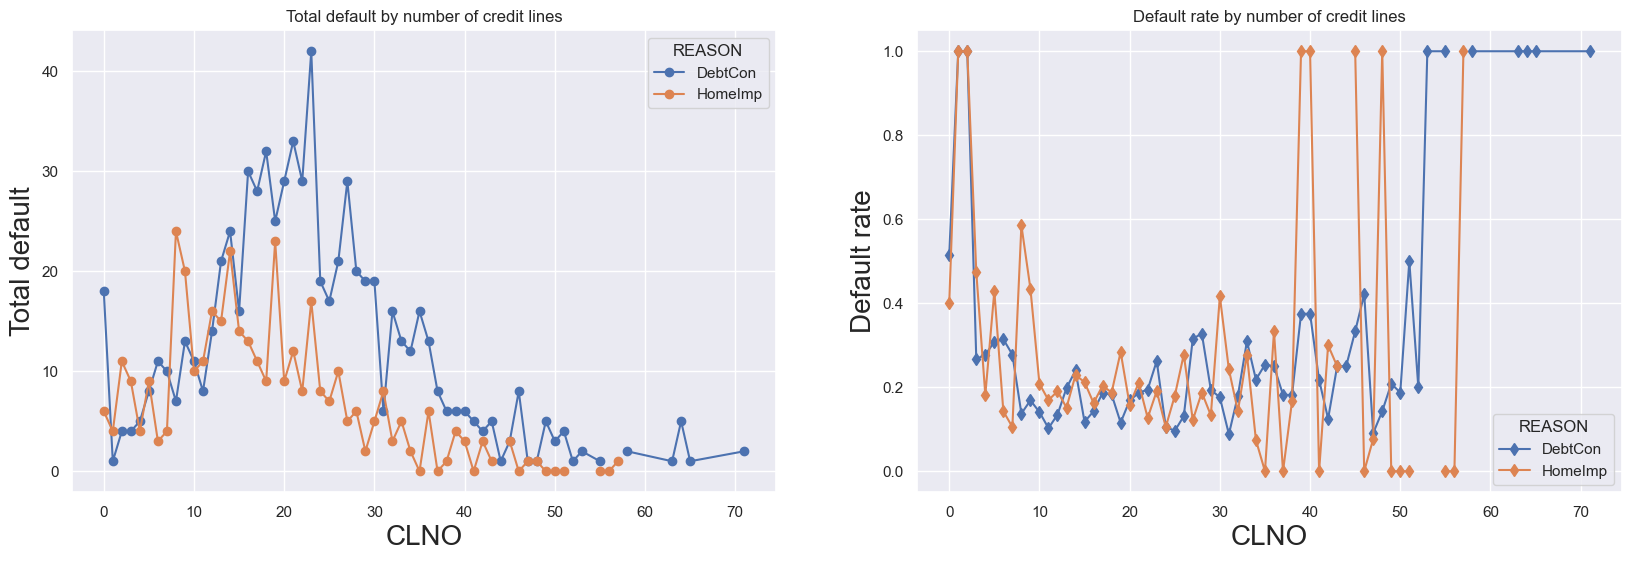

In [85]:
# set figure
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (20,6))

# pivot table
pivot_tab_1 = df.pivot_table('BAD', index = 'CLNO', columns = 'REASON', aggfunc = 'sum')
pivot_tab_2 = df.pivot_table('BAD', index = 'CLNO', columns = 'REASON', aggfunc = 'mean')

# plots
pivot_tab_1.plot(marker = 'o', ax = ax1)
pivot_tab_2.plot(marker = 'd', ax = ax2)

ax1.set_xlabel('CLNO', fontsize = 20)
ax1.set_ylabel('Total default', fontsize = 20)
ax1.set_title('Total default by number of credit lines')
ax2.set_xlabel('CLNO', fontsize = 20)
ax2.set_ylabel('Default rate', fontsize = 20)
ax2.set_title('Default rate by number of credit lines')


## Default rate by number of recent credit inquiries & major derogatory reports

Text(0.5, 1.0, 'Default rate by number of credit lines')

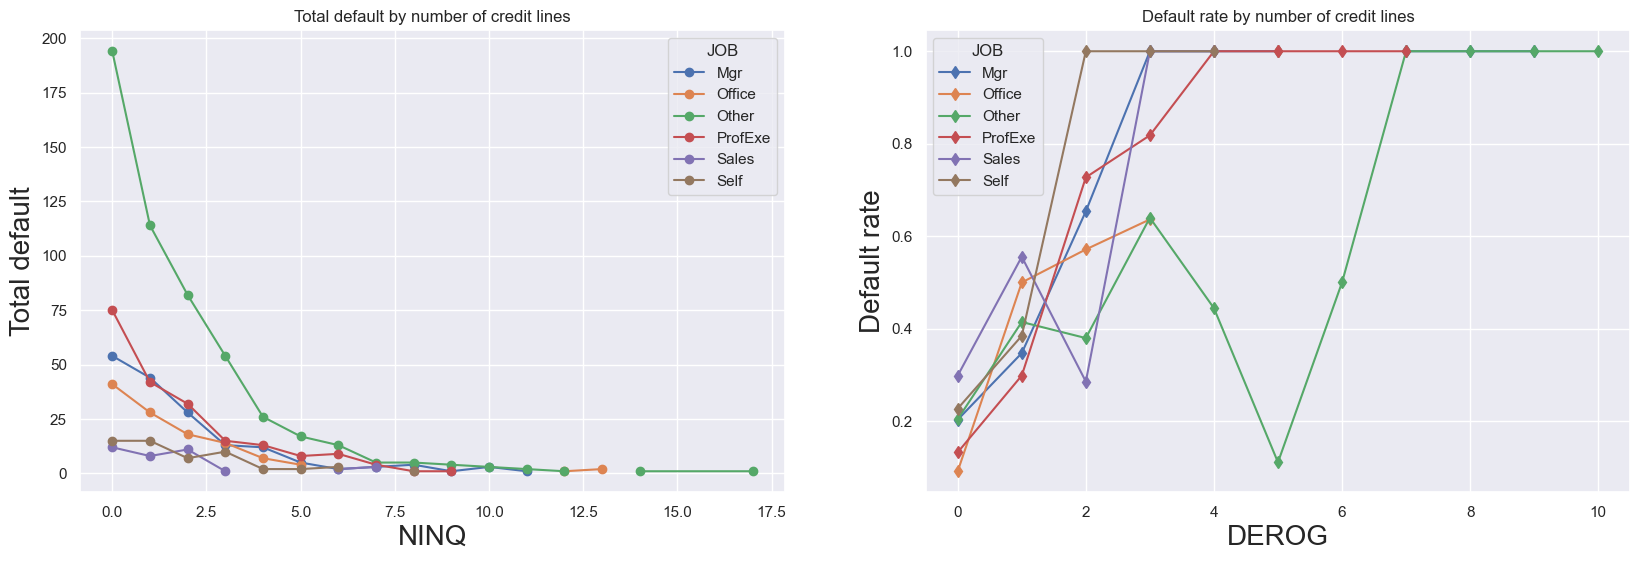

In [86]:
# set figure
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (20,6))

# pivot table
pivot_tab_1 = df.pivot_table('BAD', index = 'NINQ', columns = 'JOB', aggfunc = 'sum')
pivot_tab_2 = df.pivot_table('BAD', index = 'DEROG', columns = 'JOB', aggfunc = 'mean')

# plots
pivot_tab_1.plot(marker = 'o', ax = ax1)
pivot_tab_2.plot(marker = 'd', ax = ax2)

ax1.set_xlabel('NINQ', fontsize = 20)
ax1.set_ylabel('Total default', fontsize = 20)
ax1.set_title('Total default by number of credit lines')
ax2.set_xlabel('DEROG', fontsize = 20)
ax2.set_ylabel('Default rate', fontsize = 20)
ax2.set_title('Default rate by number of credit lines')






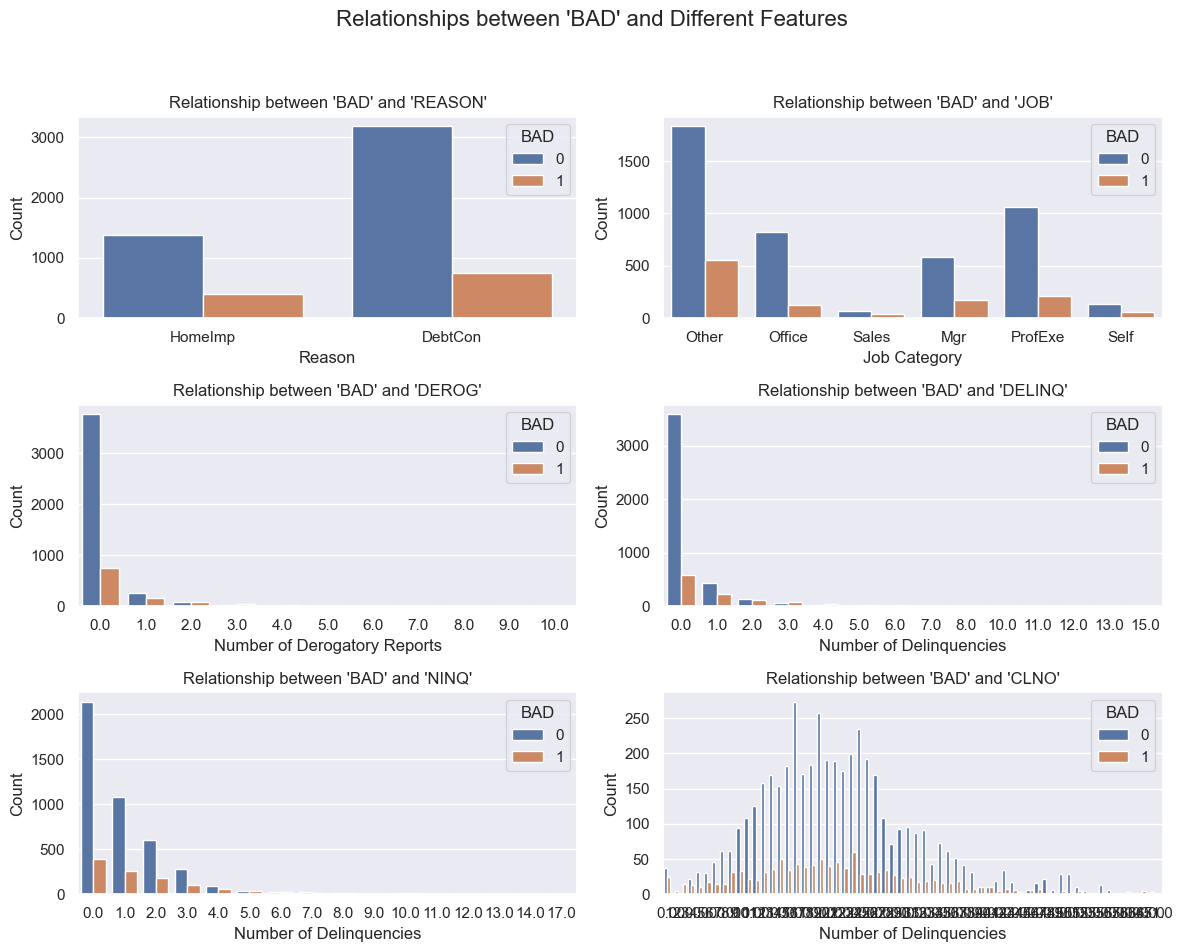

In [87]:

# Create subplots for bar plots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.suptitle("Relationships between 'BAD' and Different Features", fontsize=16)

# Bar plot for 'REASON'
sns.countplot(x='REASON', hue='BAD', data=df, ax=axes[0, 0])
axes[0, 0].set_title("Relationship between 'BAD' and 'REASON'")
axes[0, 0].set_xlabel('Reason')
axes[0, 0].set_ylabel('Count')
axes[0, 0].legend(title='BAD')

# Bar plot for 'JOB'
sns.countplot(x='JOB', hue='BAD', data=df, ax=axes[0, 1])
axes[0, 1].set_title("Relationship between 'BAD' and 'JOB'")
axes[0, 1].set_xlabel('Job Category')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend(title='BAD')

# Bar plot for 'DEROG'
sns.countplot(x='DEROG', hue='BAD', data=df, ax=axes[1, 0])
axes[1, 0].set_title("Relationship between 'BAD' and 'DEROG'")
axes[1, 0].set_xlabel('Number of Derogatory Reports')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(title='BAD')

# Bar plot for 'DELINQ'
sns.countplot(x='DELINQ', hue='BAD', data=df, ax=axes[1, 1])
axes[1, 1].set_title("Relationship between 'BAD' and 'DELINQ'")
axes[1, 1].set_xlabel('Number of Delinquencies')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title='BAD')

# Bar plot for 'NINQ'
sns.countplot(x='NINQ', hue='BAD', data=df, ax=axes[2, 0])
axes[2, 0].set_title("Relationship between 'BAD' and 'NINQ'")
axes[2, 0].set_xlabel('Number of Delinquencies')
axes[2, 0].set_ylabel('Count')
axes[2, 0].legend(title='BAD')

# Bar plot for 'CLNO'
sns.countplot(x='CLNO', hue='BAD', data=df, ax=axes[2, 1])
axes[2, 1].set_title("Relationship between 'BAD' and 'CLNO'")
axes[2, 1].set_xlabel('Number of Delinquencies')
axes[2, 1].set_ylabel('Count')
axes[2, 1].legend(title='BAD')

# Adjust layout and display plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


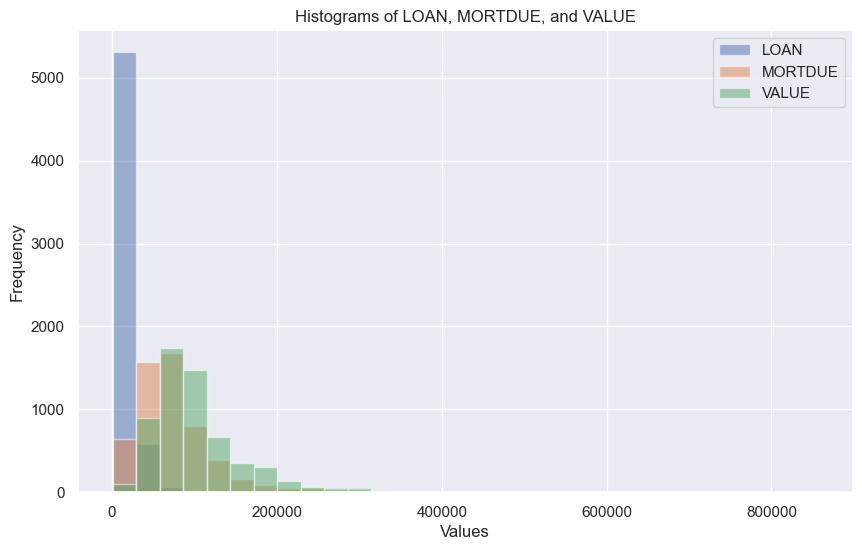

In [88]:
# Select the columns for plotting
columns_to_plot = ['LOAN', 'MORTDUE', 'VALUE']

# Plot histograms for multiple columns
df[columns_to_plot].plot(kind='hist', bins=30, alpha=0.5, figsize=(10, 6))
plt.title('Histograms of LOAN, MORTDUE, and VALUE')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()


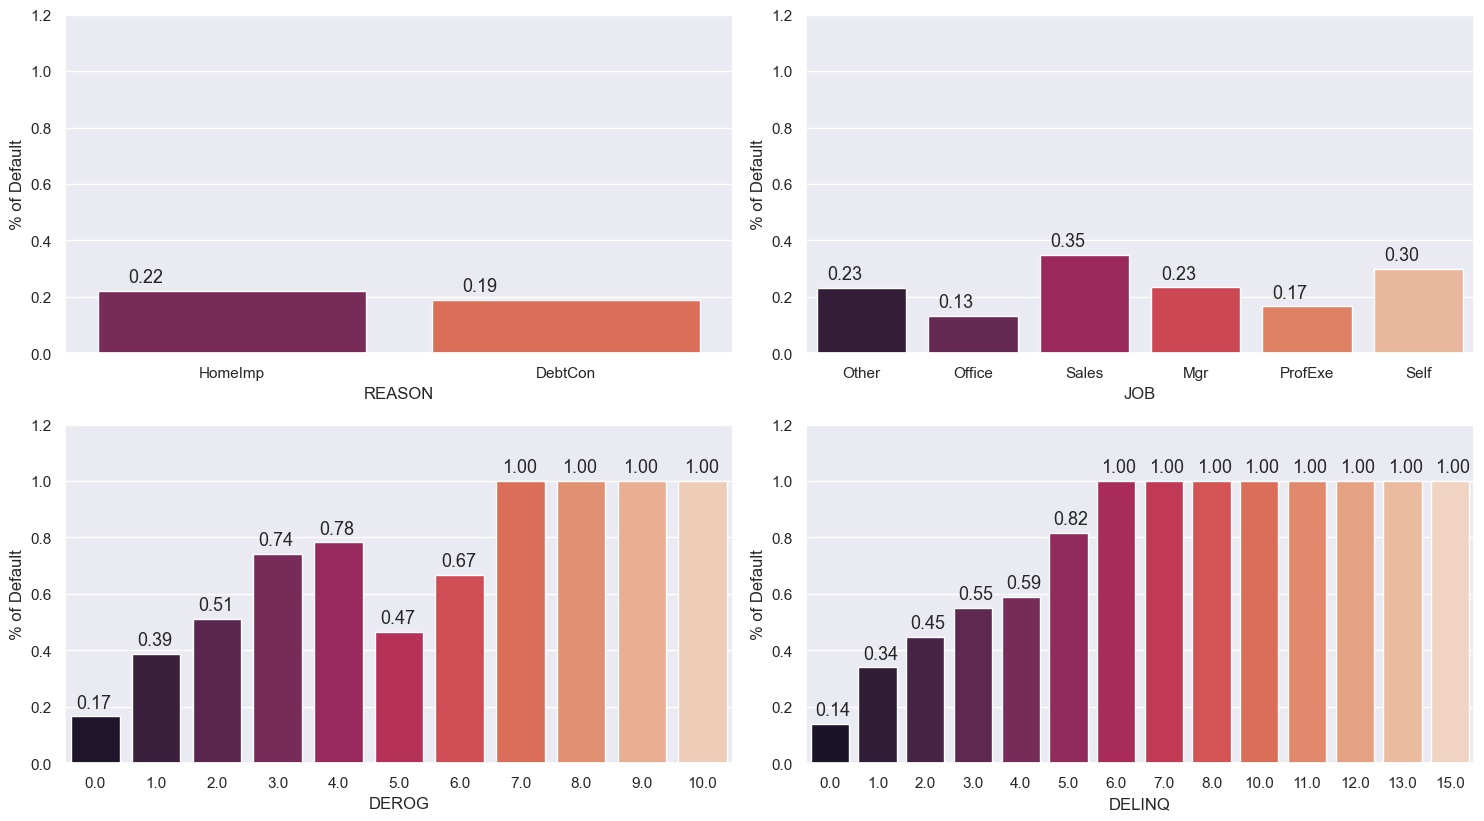

In [89]:
pay_x_fts = ['REASON','JOB','DEROG','DELINQ']
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_x_fts):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "BAD", data = df, palette = 'rocket', errorbar = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,1.2)
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.09, p.get_height()+0.03),fontsize=13)

plt.show()

* Persons having higher loan is in  debt consolidation region and belong to office job

BAD           Axes(0.125,0.712609;0.227941x0.167391)
LOAN       Axes(0.398529,0.712609;0.227941x0.167391)
MORTDUE    Axes(0.672059,0.712609;0.227941x0.167391)
VALUE         Axes(0.125,0.511739;0.227941x0.167391)
YOJ        Axes(0.398529,0.511739;0.227941x0.167391)
DEROG      Axes(0.672059,0.511739;0.227941x0.167391)
DELINQ         Axes(0.125,0.31087;0.227941x0.167391)
CLAGE       Axes(0.398529,0.31087;0.227941x0.167391)
NINQ        Axes(0.672059,0.31087;0.227941x0.167391)
CLNO              Axes(0.125,0.11;0.227941x0.167391)
DEBTINC        Axes(0.398529,0.11;0.227941x0.167391)
dtype: object

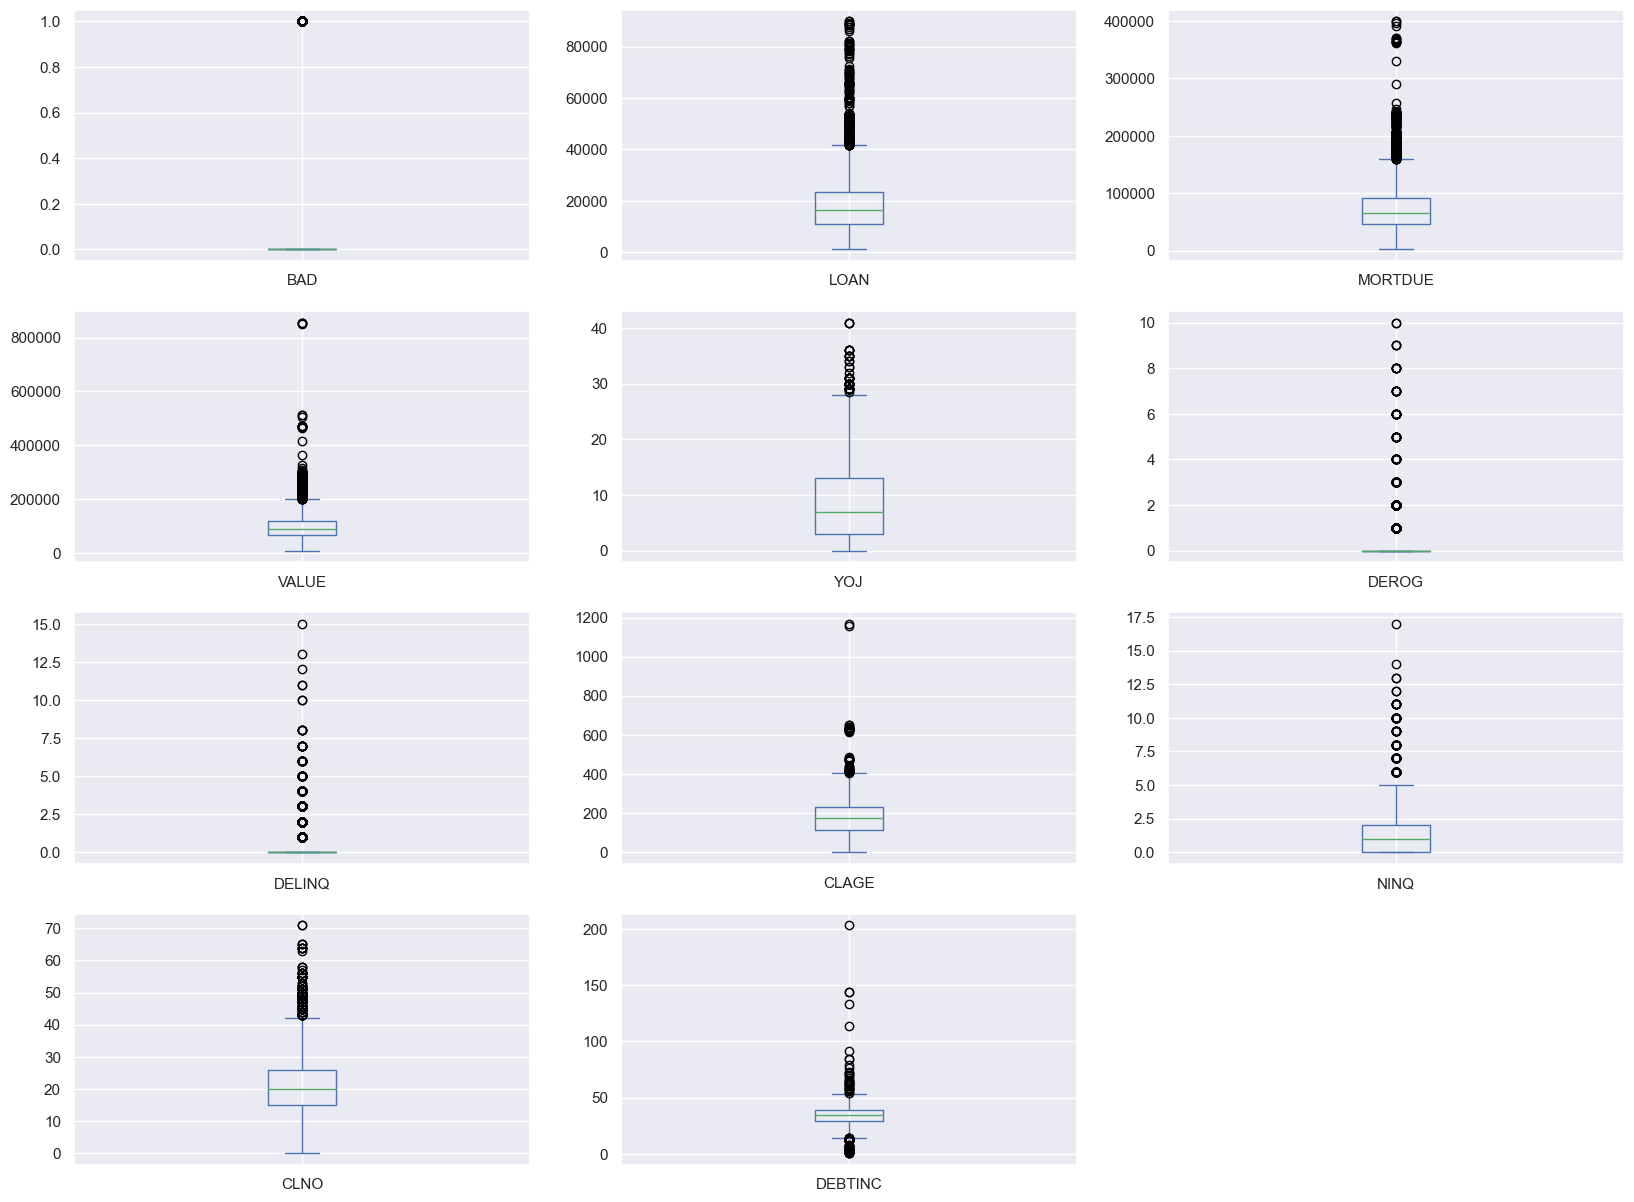

In [90]:
#Box and Whisker plot to visualize the distribution of all atributes
df.plot(kind= 'box', subplots=True, layout=(4,3), sharex=False, sharey=False, figsize=(20,15))

In [91]:
# Trimming
df = df[(df['VALUE']<600000)]


In [92]:
df.shape

(5844, 13)

## Dealing with Missing Values


In [93]:
# Drop rows with null values in all specified columns
columns_to_check = ['VALUE', 'REASON', 'JOB','DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
data_cleaned = df.dropna(subset=columns_to_check, how='all')
data_cleaned.shape

# Drop rows with null values in all specified columns
columns_to_check = ['VALUE', 'REASON', 'JOB','DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', ]
data_cleaned = df.dropna(subset=columns_to_check, how='all')
data_cleaned.shape

# Drop rows with null values in all specified columns
columns_to_check = [ 'REASON', 'JOB','DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
data_cleaned = df.dropna(subset=columns_to_check, how='all')
data_cleaned.shape

# Drop rows with null values in all specified columns
columns_to_check = [ 'REASON', 'JOB','DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO']
data_cleaned = df.dropna(subset=columns_to_check, how='all')
data_cleaned.shape

# Drop rows with null values in all specified columns
columns_to_check = ['MORTDUE', 'JOB', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
data_cleaned = df.dropna(subset=columns_to_check, how='all')
data_cleaned.shape

# Drop rows with null values in all specified columns
columns_to_check = ['MORTDUE', 'JOB', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO']
data_cleaned = df.dropna(subset=columns_to_check, how='all')
data_cleaned.shape

# Drop rows with null values in all specified columns
columns_to_check = [ 'JOB', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
data_cleaned = df.dropna(subset=columns_to_check, how='all')
data_cleaned.shape

(5827, 13)

In [94]:
# Creating copy of cleaned data
df1 = data_cleaned.copy()
df1.drop(columns=['REASON','JOB'], inplace=True)


# Initialize the IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit and transform the imputer on the DataFrame
imputed_data = imputer.fit_transform(df1)

# Create a new DataFrame with imputed values
df_imputed = pd.DataFrame(imputed_data, columns=df1.columns)

# Display the DataFrame after imputation
print("\nDataFrame after imputation:\n", df_imputed)



DataFrame after imputation:
       BAD     LOAN  MORTDUE     VALUE   YOJ  DEROG  DELINQ       CLAGE  NINQ  \
0     1.0   1100.0  25860.0   39025.0  10.5    0.0     0.0   94.366667   1.0   
1     1.0   1300.0  70053.0   68400.0   7.0    0.0     2.0  121.833333   0.0   
2     1.0   1500.0  13500.0   16700.0   4.0    0.0     0.0  149.466667   1.0   
3     0.0   1700.0  97800.0  112000.0   3.0    0.0     0.0   93.333333   0.0   
4     1.0   1700.0  30548.0   40320.0   9.0    0.0     0.0  101.466002   1.0   
...   ...      ...      ...       ...   ...    ...     ...         ...   ...   
5822  0.0  88900.0  57264.0   90185.0  16.0    0.0     0.0  221.808718   0.0   
5823  0.0  89000.0  54576.0   92937.0  16.0    0.0     0.0  208.692070   0.0   
5824  0.0  89200.0  54045.0   92924.0  15.0    0.0     0.0  212.279697   0.0   
5825  0.0  89800.0  50370.0   91861.0  14.0    0.0     0.0  213.892709   0.0   
5826  0.0  89900.0  48811.0   88934.0  15.0    0.0     0.0  219.601002   0.0   

      CLN

In [95]:
# Convert the specified columns to integer type
df_imputed[['BAD','LOAN','MORTDUE','VALUE','DEROG','DELINQ','NINQ','CLNO']] = df_imputed[['BAD','LOAN','MORTDUE','VALUE','DEROG','DELINQ','NINQ','CLNO']].astype(int)

### Imputing the categorical features

REASON -> filling the missing values with a new value "Other reason", for this attribute.

JOB -> replace the missing values with the most frequent value for simplicity

In [96]:
#Fill missing values with the most frequent category (mode) in categorical columns
data_cleaned['REASON'] = data_cleaned['REASON'].fillna('Other reason')
data_cleaned['JOB'].fillna(data_cleaned['JOB'].fillna('Other'), inplace=True)



C:\Users\hp\AppData\Local\Temp\ipykernel_15332\3508737804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['REASON'] = data_cleaned['REASON'].fillna('Other reason')
C:\Users\hp\AppData\Local\Temp\ipykernel_15332\3508737804.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['JOB'].fillna(data_cleaned['JOB'].fillna('Other'), inplace=True)


In [97]:

# Specify the index where you want to insert the columns from data2 into data1
index_to_insert = 4  # Replace with the desired index

# Select the columns from data2 that you want to add to data1
columns_to_insert = ['REASON', 'JOB']  # Replace with your column names

# Use iloc to select the columns from data2
columns_to_insert_values = data_cleaned[columns_to_insert].values

# Insert the columns from data2 into data1 at the specified index
for idx, column_name in enumerate(columns_to_insert):
    df_imputed.insert(index_to_insert + idx, column_name, columns_to_insert_values[:, idx])


# Checking Correlation between each factors

In [98]:
# Creating copy of cleaned data
df1 = df_imputed.copy()
df1.drop(columns=['REASON','JOB'], inplace=True)

# Finding correlation between all the features and the target feature "BAD"
corr_analysis = df1.corr(method='pearson')
corr_analysis

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,1.000000,-0.086142,-0.044119,-0.052105,-0.070837,0.265190,0.351183,-0.173489,0.184546,-0.003052,0.310448
LOAN,-0.086142,1.000000,0.214211,0.337014,0.120595,-0.002898,-0.042195,0.088715,0.057450,0.077790,0.075683
MORTDUE,-0.044119,0.214211,1.000000,0.883527,-0.091636,-0.048068,0.006451,0.130070,0.043792,0.366894,0.197575
VALUE,-0.052105,0.337014,0.883527,1.000000,-0.009879,-0.042873,-0.001901,0.185830,0.003572,0.287730,0.132051
YOJ,-0.070837,0.120595,-0.091636,-0.009879,1.000000,-0.058626,0.044349,0.220465,-0.072019,0.016110,-0.072955
DEROG,0.265190,-0.002898,-0.048068,-0.042873,-0.058626,1.000000,0.170483,-0.080813,0.171472,0.058535,0.043864
DELINQ,0.351183,-0.042195,0.006451,-0.001901,0.044349,0.170483,1.000000,0.024764,0.066919,0.161017,0.127932
CLAGE,-0.173489,0.088715,0.130070,0.185830,0.220465,-0.080813,0.024764,1.000000,-0.121353,0.245165,-0.065396
NINQ,0.184546,0.057450,0.043792,0.003572,-0.072019,0.171472,0.066919,-0.121353,1.000000,0.093341,0.204398
CLNO,-0.003052,0.077790,0.366894,0.287730,0.016110,0.058535,0.161017,0.245165,0.093341,1.000000,0.203633


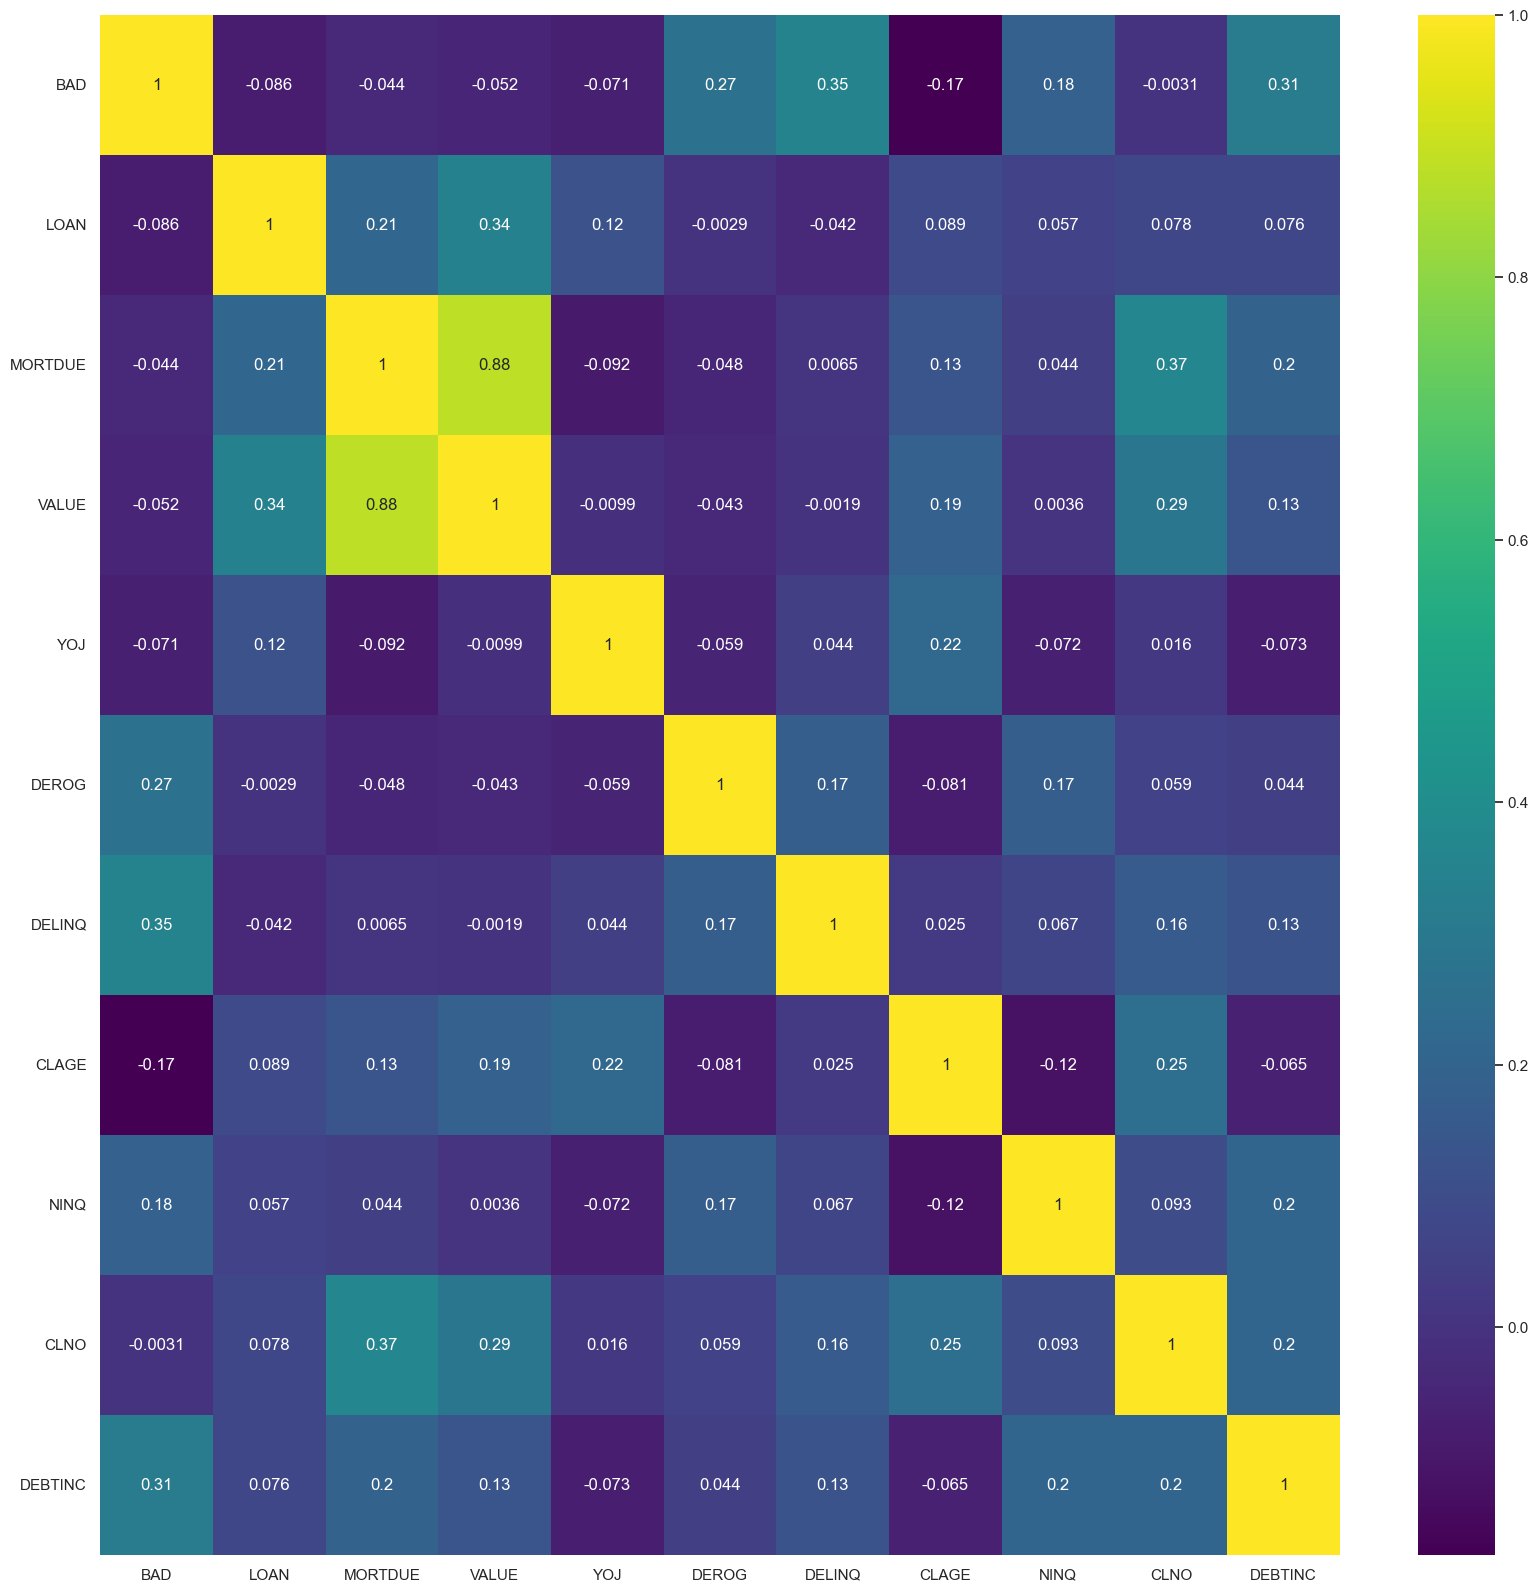

In [99]:
# creating a heatmap
plt.figure(figsize=(20, 20))
heat_map = sns.heatmap(corr_analysis, annot=True, cmap="viridis")
heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=0)
plt.show()

In [100]:
 columns_to_check = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'CLAGE', 'DEBTINC', 'CLAGE', 'CLNO', 'DEBTINC']

# Calculate skewness for each column
skewness = df_imputed[columns_to_check].skew()

# Print the skewness values
print(skewness)

LOAN       2.050901
MORTDUE    1.772559
VALUE      1.854143
YOJ        0.998521
CLAGE      1.386530
DEBTINC    2.753329
CLAGE      1.386530
CLNO       0.776329
DEBTINC    2.753329
dtype: float64


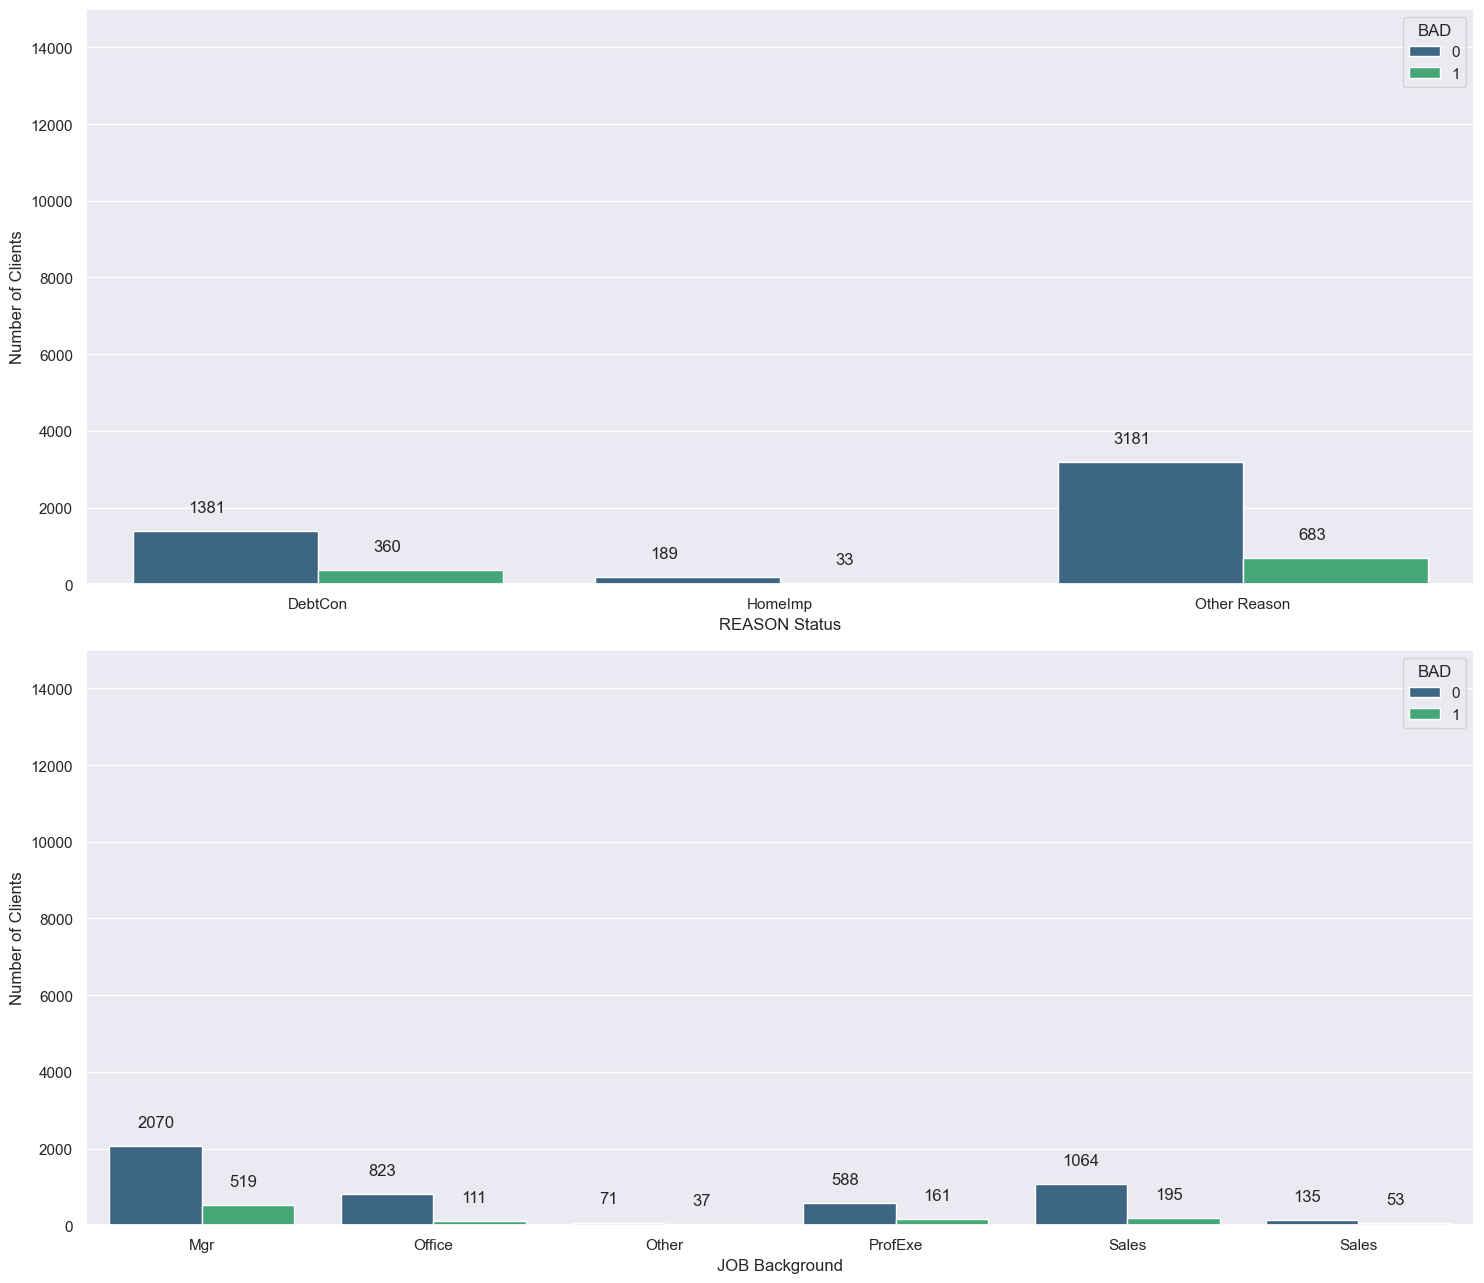

In [101]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 13))

# Count plot for MARRIAGE
ax1 = sns.countplot(data=df_imputed, x='REASON', hue='BAD', palette='viridis', ax=axes[0])
ax1.set_xlabel("REASON Status", fontsize=12)
ax1.set_ylabel("Number of Clients", fontsize=12)
ax1.set_ylim(0, 15000)
ax1.set_xticks([0, 1, 2])
ax1.set_xticklabels(['DebtCon', 'HomeImp', 'Other Reason'], fontsize=11)
for p in ax1.patches:
    ax1.annotate(int(p.get_height()), (p.get_x() + 0.12, p.get_height() + 500))

# Count plot for EDUCATION
ax2 = sns.countplot(data=df_imputed, x='JOB', hue='BAD', palette='viridis', ax=axes[1])
ax2.set_xlabel("JOB Background", fontsize=12)
ax2.set_ylabel("Number of Clients", fontsize=12)
ax2.set_ylim(0, 15000)
ax2.set_xticks([0, 1, 2, 3,4,5])
ax2.set_xticklabels(['Mgr', 'Office', 'Other', 'ProfExe','Sales','Sales'], fontsize=11)
for p in ax2.patches:
    ax2.annotate(int(p.get_height()), (p.get_x() + 0.12, p.get_height() + 500))


plt.tight_layout()
plt.show()

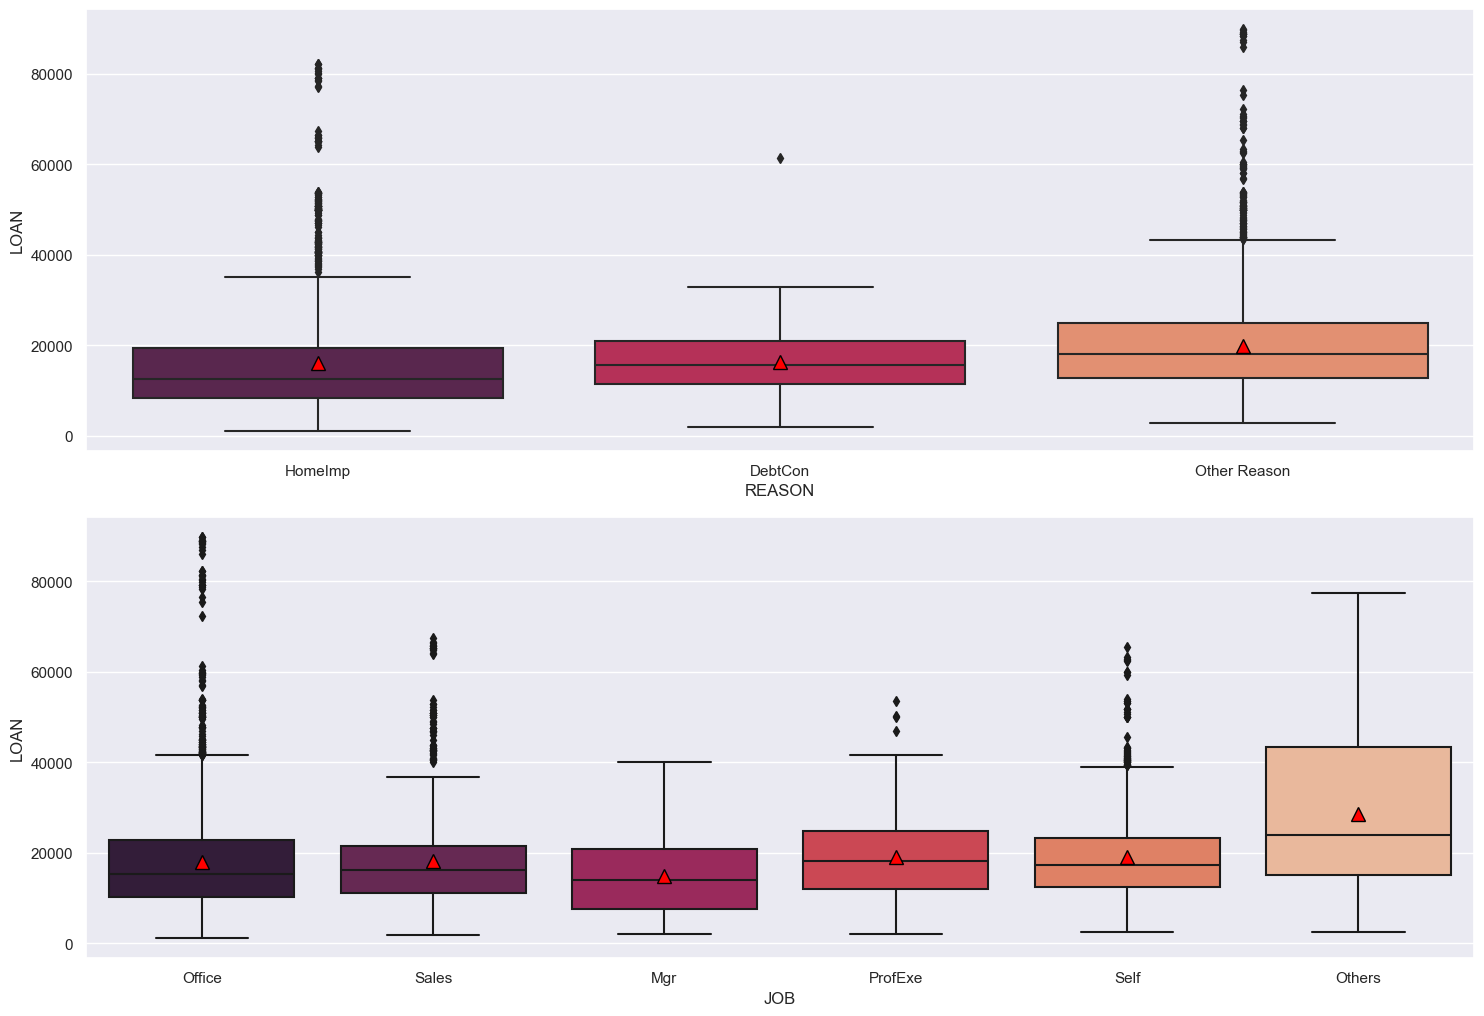

In [102]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 1, 1)
sns.boxplot(x="REASON", y="LOAN", data=df_imputed, palette='rocket', showmeans=True,
            meanprops={"markerfacecolor": "red", "markeredgecolor": "black", "markersize": "10"})
plt.ticklabel_format(style='plain', axis='y')
plt.xticks([0, 1, 2], ['HomeImp', 'DebtCon', 'Other Reason'], fontsize=11)


plt.subplot(4, 1, 2)
sns.boxplot(x="JOB", y="LOAN", data=df_imputed, palette='rocket', showmeans=True,
            meanprops={"markerfacecolor": "red", "markeredgecolor": "black", "markersize": "10"})
plt.ticklabel_format(style='plain', axis='y')
plt.xticks([0, 1, 2, 3,4,5], ['Office', 'Sales', 'Mgr','ProfExe','Self', 'Others'], fontsize=11)


plt.tight_layout()
plt.show()

In [103]:
df_imputed.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860,39025,HomeImp,Other,10.5,0,0,94.366667,1,9,36.581222
1,1,1300,70053,68400,HomeImp,Other,7.0,0,2,121.833333,0,14,38.226125
2,1,1500,13500,16700,HomeImp,Other,4.0,0,0,149.466667,1,10,36.570670
3,0,1700,97800,112000,HomeImp,Office,3.0,0,0,93.333333,0,14,32.570106
4,1,1700,30548,40320,HomeImp,Other,9.0,0,0,101.466002,1,8,37.113614


### Feature transformation

In [104]:
#separating the data and labels
X = df_imputed.drop(columns=['BAD','REASON','JOB'],axis=1)
print(X)
Y = df_imputed['BAD']

       LOAN  MORTDUE   VALUE   YOJ  DEROG  DELINQ       CLAGE  NINQ  CLNO  \
0      1100    25860   39025  10.5      0       0   94.366667     1     9   
1      1300    70053   68400   7.0      0       2  121.833333     0    14   
2      1500    13500   16700   4.0      0       0  149.466667     1    10   
3      1700    97800  112000   3.0      0       0   93.333333     0    14   
4      1700    30548   40320   9.0      0       0  101.466002     1     8   
...     ...      ...     ...   ...    ...     ...         ...   ...   ...   
5822  88900    57264   90185  16.0      0       0  221.808718     0    16   
5823  89000    54576   92937  16.0      0       0  208.692070     0    15   
5824  89200    54045   92924  15.0      0       0  212.279697     0    15   
5825  89800    50370   91861  14.0      0       0  213.892709     0    16   
5826  89900    48811   88934  15.0      0       0  219.601002     0    16   

        DEBTINC  
0     36.581222  
1     38.226125  
2     36.570670  
3  

### Data standardization

In [105]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(X)
print(standardized_data)


[[-1.56418915 -1.01465076 -1.15444835 ... -0.08580583 -1.22791545
   0.2693663 ]
 [-1.5463123  -0.01198174 -0.61009854 ... -0.68531488 -0.72629856
   0.47584558]
 [-1.52843545 -1.29507955 -1.56815421 ... -0.08580583 -1.12759207
   0.26804179]
 ...
 [ 6.31056354 -0.37517785 -0.15564289 ... -0.68531488 -0.62597518
   0.14074773]
 [ 6.3641941  -0.45855777 -0.17534141 ... -0.68531488 -0.5256518
  -0.01185607]
 [ 6.37313252 -0.493929   -0.22958181 ... -0.68531488 -0.5256518
   0.017095  ]]


In [106]:
# Convert the standardized array back to a DataFrame
standardized_df = pd.DataFrame(standardized_data, columns=[ 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG','DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'])

# Display the standardized DataFrame
print(standardized_df)

          LOAN   MORTDUE     VALUE       YOJ     DEROG    DELINQ     CLAGE  \
0    -1.564189 -1.014651 -1.154448  0.206379 -0.278031 -0.380102 -1.004615   
1    -1.546312 -0.011982 -0.610099 -0.274944 -0.278031  1.550895 -0.679039   
2    -1.528435 -1.295080 -1.568154 -0.687507 -0.278031 -0.380102 -0.351487   
3    -1.510559  0.617554  0.197856 -0.825028 -0.278031 -0.380102 -1.016863   
4    -1.510559 -0.908287 -1.130451  0.000098 -0.278031 -0.380102 -0.920463   
...        ...       ...       ...       ...       ...       ...       ...   
5822  6.283748 -0.302144 -0.206399  0.962744 -0.278031 -0.380102  0.506019   
5823  6.292687 -0.363130 -0.155402  0.962744 -0.278031 -0.380102  0.350541   
5824  6.310564 -0.375178 -0.155643  0.825223 -0.278031 -0.380102  0.393067   
5825  6.364194 -0.458558 -0.175341  0.687702 -0.278031 -0.380102  0.412186   
5826  6.373133 -0.493929 -0.229582  0.825223 -0.278031 -0.380102  0.479850   

          NINQ      CLNO   DEBTINC  
0    -0.085806 -1.227915  

In [107]:

# Specify the index where you want to insert the columns from data2 into data1
index_to_insert = 3  # Replace with the desired index

# Select the columns from data2 that you want to add to data1
columns_to_insert = ['REASON', 'JOB']  # Replace with your column names

# Use iloc to select the columns from data2
columns_to_insert_values = df_imputed[columns_to_insert].values

# Insert the columns from data2 into data1 at the specified index
for idx, column_name in enumerate(columns_to_insert):
    standardized_df.insert(index_to_insert + idx, column_name, columns_to_insert_values[:, idx])
    
# Specify the index where you want to insert the columns from data2 into data1
index_to_insert = 0  # Replace with the desired index

# Select the columns from data2 that you want to add to data1
columns_to_insert = ['BAD']  # Replace with your column names

# Use iloc to select the columns from data2
columns_to_insert_values = df_imputed[columns_to_insert].values

# Insert the columns from data2 into data1 at the specified index
for idx, column_name in enumerate(columns_to_insert):
    standardized_df.insert(index_to_insert + idx, column_name, columns_to_insert_values[:, idx])


In [108]:
standardized_df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,-1.564189,-1.014651,-1.154448,HomeImp,Other,0.206379,-0.278031,-0.380102,-1.004615,-0.085806,-1.227915,0.269366
1,1,-1.546312,-0.011982,-0.610099,HomeImp,Other,-0.274944,-0.278031,1.550895,-0.679039,-0.685315,-0.726299,0.475846
2,1,-1.528435,-1.295080,-1.568154,HomeImp,Other,-0.687507,-0.278031,-0.380102,-0.351487,-0.085806,-1.127592,0.268042
3,0,-1.510559,0.617554,0.197856,HomeImp,Office,-0.825028,-0.278031,-0.380102,-1.016863,-0.685315,-0.726299,-0.234136
4,1,-1.510559,-0.908287,-1.130451,HomeImp,Other,0.000098,-0.278031,-0.380102,-0.920463,-0.085806,-1.328239,0.336196


In [109]:
df_imputed1 = standardized_df.copy()

# one-hot encoding to convert categorical variables into binary vectors

REASON and JOB are categorical attributes and of string type. Some plots work only with numerical values, so we need to convert them to numericals. Using Label Encoding on these two variables to convert them to numerical values. (We can also use One-Hot-Encoding)

In [110]:

# Specify the columns for one-hot encoding
columns_to_encode = ['JOB', 'REASON']

# Perform one-hot encoding
df_imputed1 = pd.get_dummies(df_imputed, columns=columns_to_encode, drop_first=True)

# Now 'encoded_data' contains the one-hot encoded features with dropped columns for multicollinearity


In [111]:
# Creating new binary vaiables B_DEROG,B_DELINQ from DEROG,DELINQ

df_imputed["B_DEROG"] = (df_imputed["DEROG"]>=1)*1
df_imputed["B_DELINQ"] = (df_imputed["DELINQ"]>=1)*1

In [112]:
df_imputed1.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self,REASON_HomeImp,REASON_Other reason
0,1,1100,25860,39025,10.5,0,0,94.366667,1,9,36.581222,0,1,0,0,0,1,0
1,1,1300,70053,68400,7.0,0,2,121.833333,0,14,38.226125,0,1,0,0,0,1,0
2,1,1500,13500,16700,4.0,0,0,149.466667,1,10,36.570670,0,1,0,0,0,1,0
3,0,1700,97800,112000,3.0,0,0,93.333333,0,14,32.570106,1,0,0,0,0,1,0
4,1,1700,30548,40320,9.0,0,0,101.466002,1,8,37.113614,0,1,0,0,0,1,0


All the attributes are of numerical type,now, we can use plots to understand the distribution of all the the attributes.
Plotting Boxplots for each attribute in df

# Data Cleaning and Transformation

In [113]:
columns_to_check = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'CLAGE',  'CLNO','DEBTINC']

#Check the updated skewness of the columns
skewness = df_imputed1[columns_to_check].skew()

# Print the skewness values
print(skewness)

LOAN       2.050901
MORTDUE    1.772559
VALUE      1.854143
YOJ        0.998521
CLAGE      1.386530
CLNO       0.776329
DEBTINC    2.753329
dtype: float64


In [114]:
data = df_imputed1.copy()

# List of columns with high skewness
high_skew_columns = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'CLNO', 'DEBTINC']

# Apply appropriate transformations to decrease skewness
for column in high_skew_columns:
    if column == 'CLAGE'  or column == 'MORTDUE' or column == 'YOJ' :

        data[column] = data[column].apply(lambda t : np.log(t+1))
    else:
        if (data[column] > 0).all():  # Check for positive values
            data[column], _ = boxcox(data[column])  # Apply Box-Cox transformation

In [115]:
columns_to_check = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'CLAGE',  'CLNO','DEBTINC']

#Check the updated skewness of the columns
skewness = data[columns_to_check].skew()

# Print the skewness values
print(skewness)

LOAN       0.012964
MORTDUE   -0.962651
VALUE      0.007421
YOJ       -0.653526
CLAGE      1.386530
CLNO       0.776329
DEBTINC    0.874789
dtype: float64


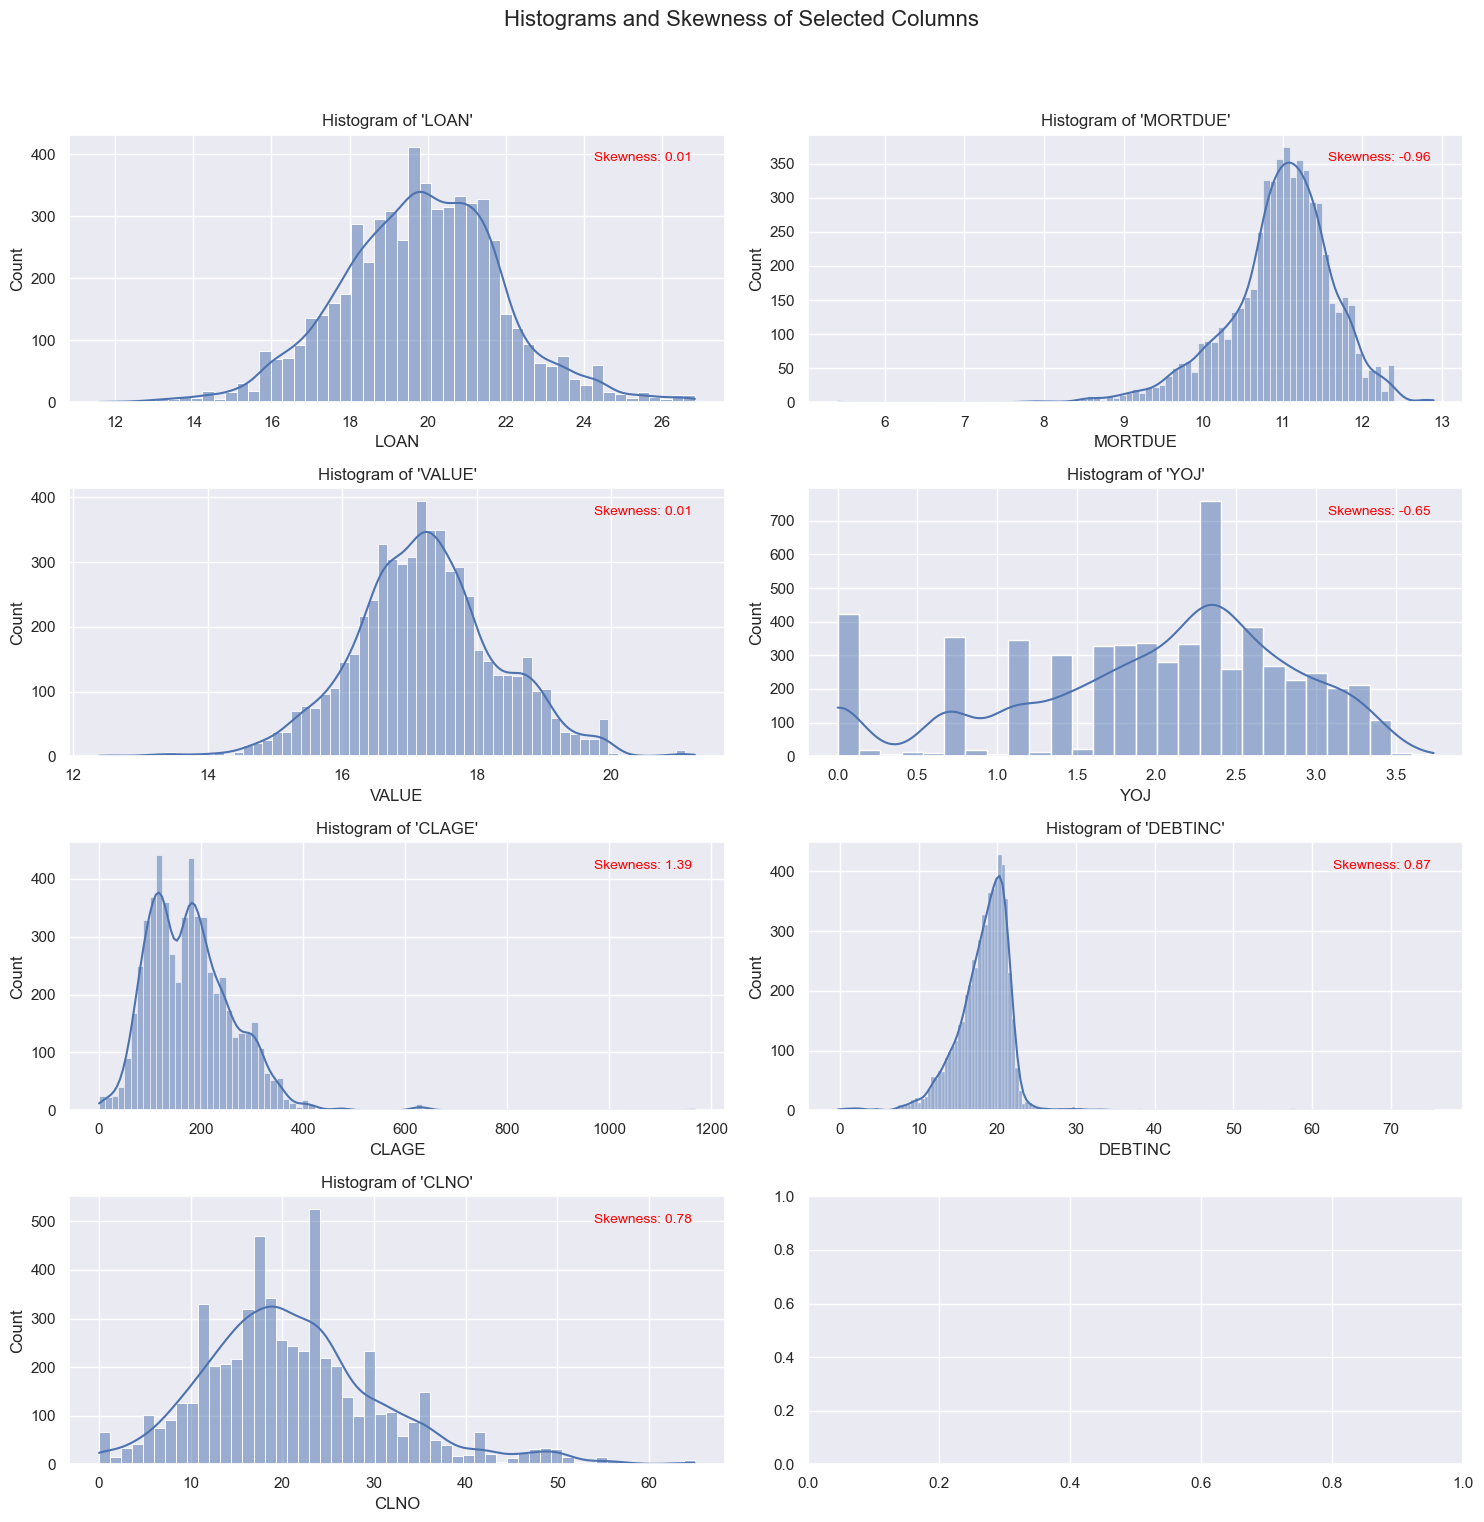

In [116]:
# Select the columns to check for skewness
columns_to_check = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'CLAGE', 'DEBTINC' ,'CLNO']

# Create subplots for histograms
num_columns = len(columns_to_check)
num_rows = (num_columns + 1) // 2  # Calculate the number of subplot rows

fig, axes = plt.subplots(num_rows, 2, figsize=(15, 4 * num_rows))
fig.suptitle("Histograms and Skewness of Selected Columns", fontsize=16)

for idx, column in enumerate(columns_to_check):
    row_idx = idx // 2
    col_idx = idx % 2

    # Plot histogram
    sns.histplot(data[column], ax=axes[row_idx, col_idx], kde=True)
    axes[row_idx, col_idx].set_title(f"Histogram of '{column}'")

    # Calculate skewness
    skew_value = data[column].skew()
    axes[row_idx, col_idx].text(0.95, 0.9, f"Skewness: {skew_value:.2f}", transform=axes[row_idx, col_idx].transAxes,
                                horizontalalignment='right', fontsize=10, color='red')

# Adjust layout and display plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [117]:
data.shape

(5827, 18)

Plotting Heatmap of correlation after cleaning and transforming the attributes

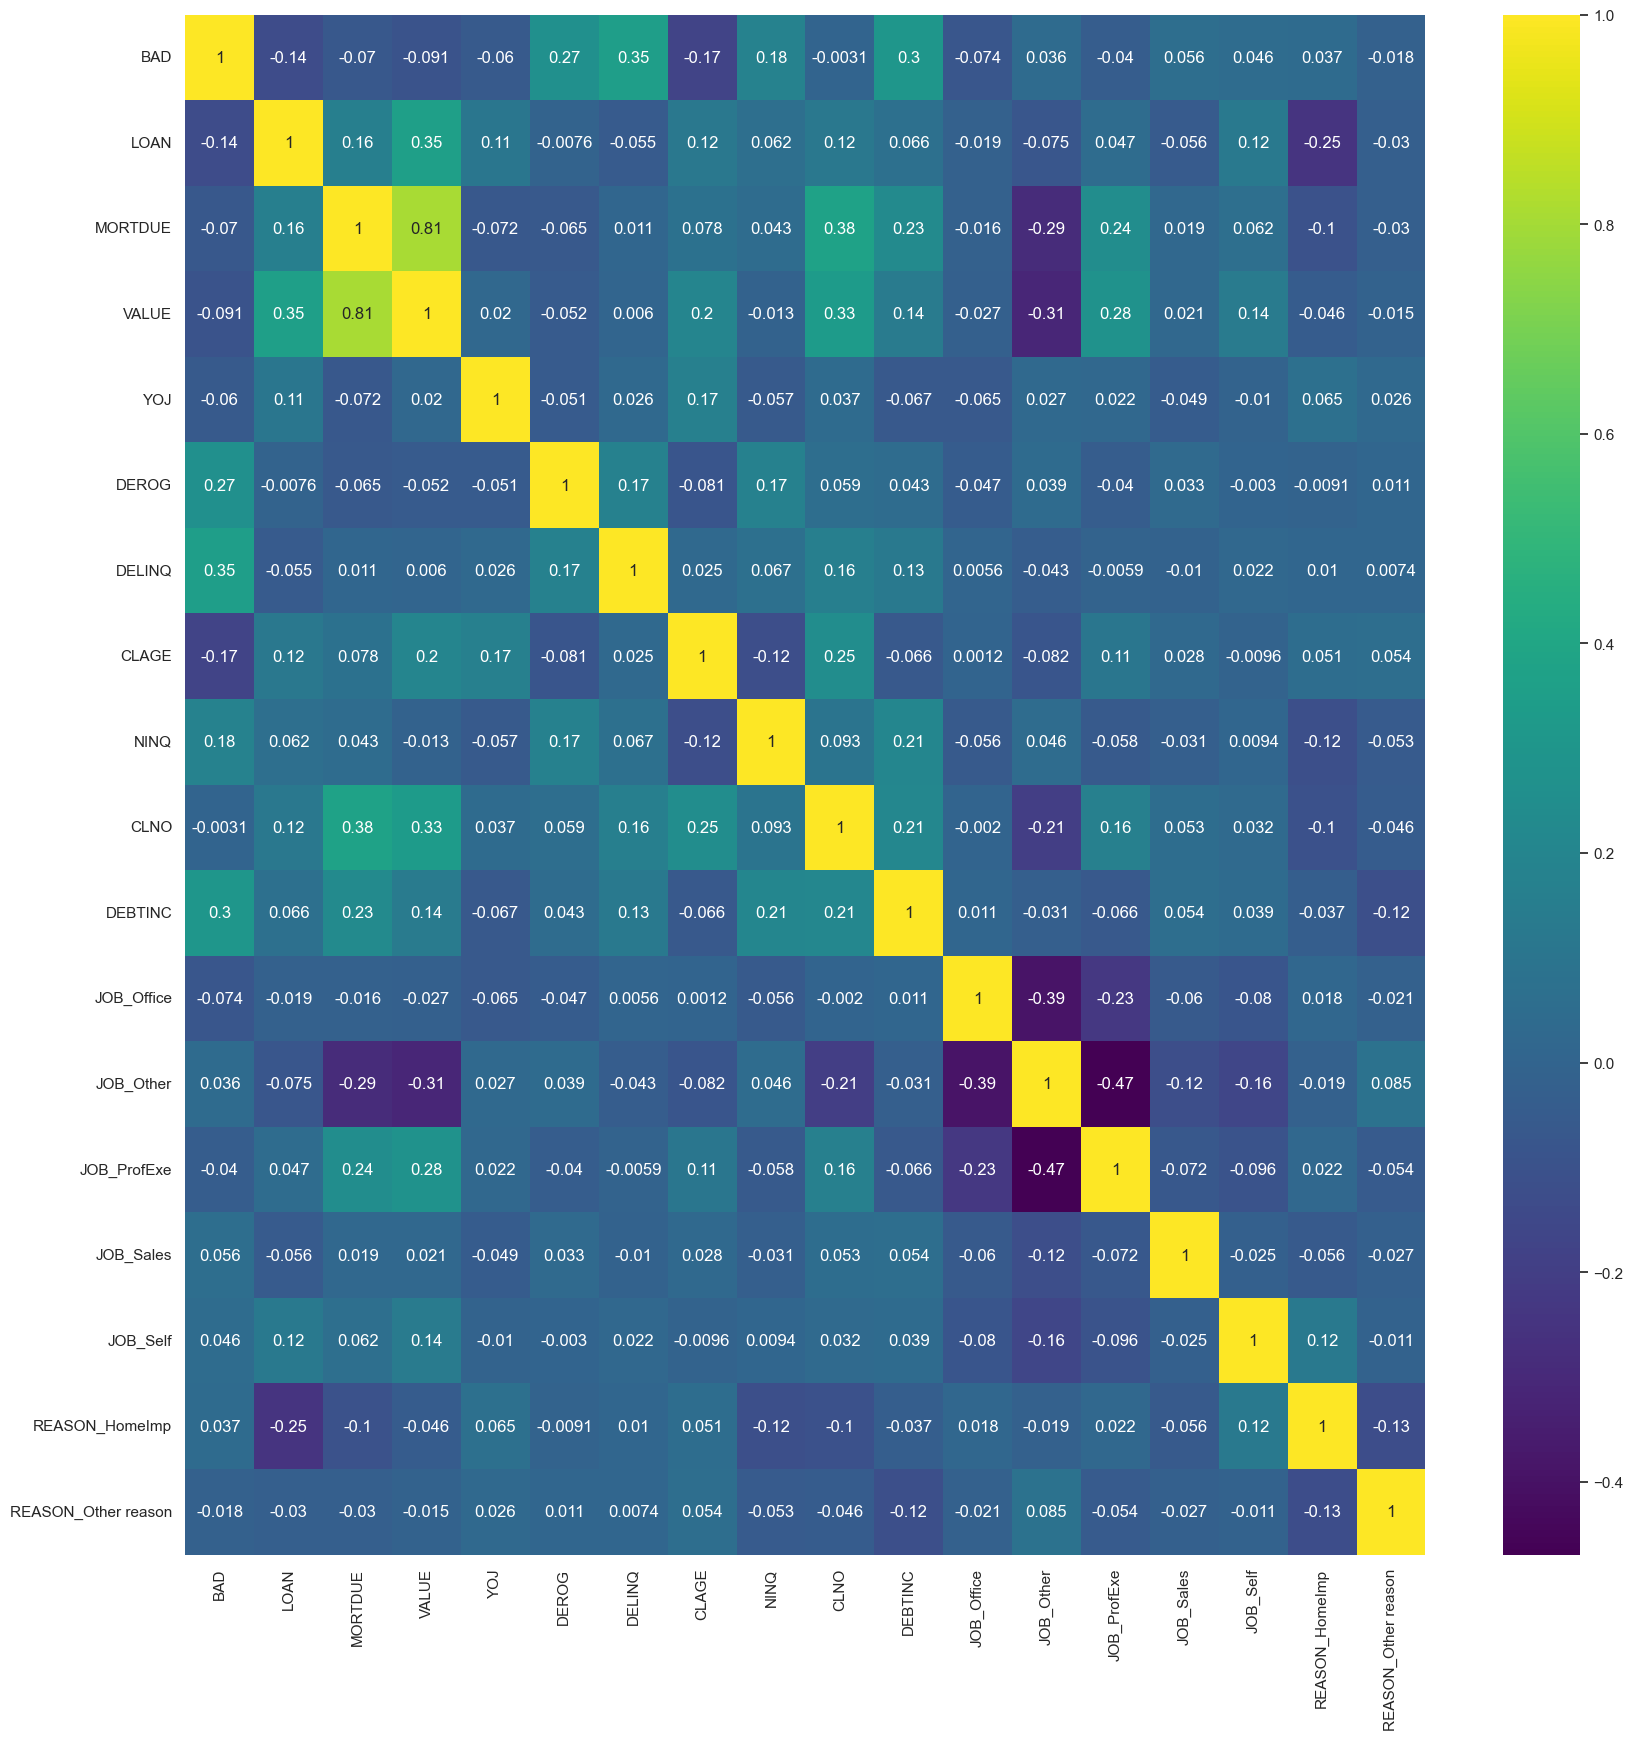

In [118]:

# Create a figure and plot the heatmap
plt.figure(figsize=(20, 20))
heat_map = sns.heatmap(data.corr(method='pearson'), annot=True, cmap="viridis")
heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=0)
plt.show()



* The heatmat shows that features are correlated with each other . "DEROG","DELINQ","CLAGE","NINQ","DEBTINC","YOJ","LOAN" columns having high correlation

### Feature selection


### Using  Correlation factor for feature selection

In [119]:
# Finding correlation between all the features and the target feature "BAD"

data.corr(method='pearson')

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self,REASON_HomeImp,REASON_Other reason
BAD,1.000000,-0.135526,-0.069907,-0.090741,-0.059511,0.265190,0.351183,-0.173489,0.184546,-0.003052,0.304036,-0.074105,0.036424,-0.040282,0.055934,0.045766,0.037212,-0.018469
LOAN,-0.135526,1.000000,0.156398,0.351480,0.109116,-0.007630,-0.054609,0.118305,0.061866,0.118776,0.065675,-0.018596,-0.075344,0.046500,-0.055932,0.123128,-0.245618,-0.029644
MORTDUE,-0.069907,0.156398,1.000000,0.806122,-0.071504,-0.065415,0.011188,0.078318,0.043251,0.378675,0.225126,-0.016076,-0.289990,0.244476,0.018731,0.061965,-0.100557,-0.029768
VALUE,-0.090741,0.351480,0.806122,1.000000,0.020345,-0.051670,0.006046,0.200103,-0.012861,0.331297,0.137466,-0.027224,-0.314102,0.281528,0.021442,0.138127,-0.045981,-0.014871
YOJ,-0.059511,0.109116,-0.071504,0.020345,1.000000,-0.050670,0.026079,0.165799,-0.056509,0.036792,-0.067097,-0.064787,0.026702,0.021805,-0.048626,-0.010022,0.064561,0.026353
DEROG,0.265190,-0.007630,-0.065415,-0.051670,-0.050670,1.000000,0.170483,-0.080813,0.171472,0.058535,0.042845,-0.046961,0.038988,-0.039580,0.032649,-0.002971,-0.009117,0.010842
DELINQ,0.351183,-0.054609,0.011188,0.006046,0.026079,0.170483,1.000000,0.024764,0.066919,0.161017,0.126632,0.005555,-0.042766,-0.005898,-0.010464,0.021556,0.009989,0.007445
CLAGE,-0.173489,0.118305,0.078318,0.200103,0.165799,-0.080813,0.024764,1.000000,-0.121353,0.245165,-0.065674,0.001237,-0.081675,0.109653,0.027510,-0.009593,0.050856,0.054123
NINQ,0.184546,0.061866,0.043251,-0.012861,-0.056509,0.171472,0.066919,-0.121353,1.000000,0.093341,0.207513,-0.056278,0.045852,-0.057546,-0.030862,0.009370,-0.116025,-0.052548
CLNO,-0.003052,0.118776,0.378675,0.331297,0.036792,0.058535,0.161017,0.245165,0.093341,1.000000,0.211393,-0.002007,-0.205238,0.163251,0.052609,0.032053,-0.103142,-0.046424


In [120]:
data.columns


Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE',
       'NINQ', 'CLNO', 'DEBTINC', 'JOB_Office', 'JOB_Other', 'JOB_ProfExe',
       'JOB_Sales', 'JOB_Self', 'REASON_HomeImp', 'REASON_Other reason'],
      dtype='object')

In [121]:
# Gathering the 2 feature sets with high peason correlation value,one with 7 and other with 10 features in it

feat1=["LOAN","YOJ","DEROG","DELINQ","CLAGE","NINQ","DEBTINC"]
feat2=["LOAN","YOJ","DEROG","DELINQ","CLAGE","NINQ","DEBTINC","JOB_Office","JOB_Sales"]

## Train - Test - Split

In [143]:
X1 = data[feat1]
Y1 = data["BAD"]

X2 = data[feat2]
Y2 = data["BAD"]

In [144]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(X1,Y1,test_size=0.3,random_state=0)
print(X1.shape,x_train1.shape,x_test1.shape)




(5827, 7) (4078, 7) (1749, 7)


In [145]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(X2,Y2,test_size=0.3,random_state=0)
print(X2.shape,x_train2.shape,x_test2.shape)

(5827, 9) (4078, 9) (1749, 9)


### Drawing AUC-ROC curve

In [146]:
def plotconfusionmatrix(y, y_pred):
    
    
    cf_matrix = confusion_matrix(y, y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    plt.show()

 # defining plot_roc function function

def plot_roc(y_test, y_score):
    fpr, tpr, thresholds = roc_curve(y_test, y_score)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("ROC plot for loan defaulter prediction")
    plt.legend(loc="lower right")
    plt.show()

    
def model_analysis(model,x_test, y_true,y_pred):
    plot_roc(y_true, y_pred)
    plotconfusionmatrix(y_true, y_pred)
    print(classification_report(y_true, y_pred))



## Training the Model using Regression (Logistic Regression) Method

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy score :  0.8650657518582047
f1 score :  0.7351319578843617
precision score :  0.8422122309915039
recall score :  0.6957238938198621


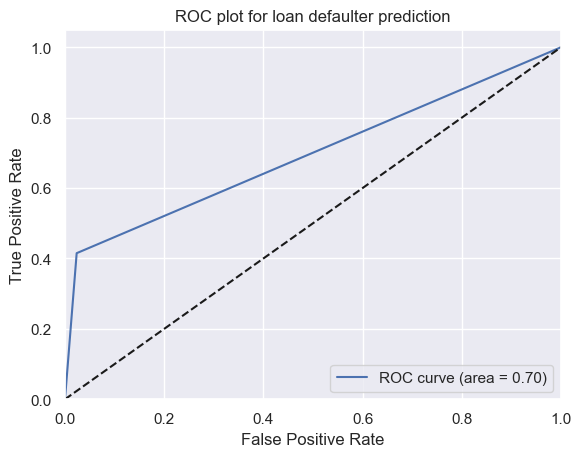

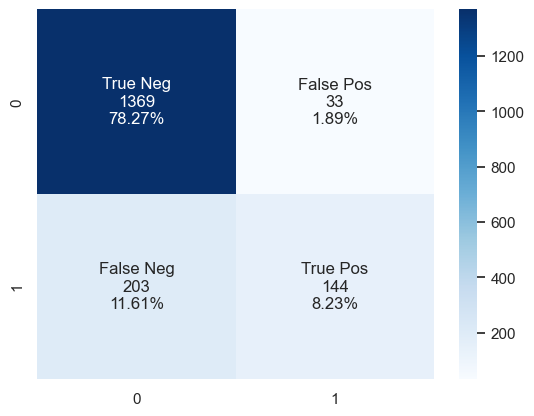

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1402
           1       0.81      0.41      0.55       347

    accuracy                           0.87      1749
   macro avg       0.84      0.70      0.74      1749
weighted avg       0.86      0.87      0.85      1749



In [147]:
# Logistic Regression using above feature set 1
logreg = LogisticRegression()

logreg.fit(x_train1,y_train1)
y_pred1 = logreg.predict(x_test1)


a1 = accuracy_score(y_test1,y_pred1)
f1 = f1_score(y_test1, y_pred1, average="macro")
p1 = precision_score(y_test1, y_pred1, average="macro")
r1 = recall_score(y_test1, y_pred1, average="macro")
print("accuracy score : ",a1)
print("f1 score : ",f1)
print("precision score : ",p1)
print("recall score : ",r1)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_test1, y_pred1)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
model_analysis(logreg,x_test1,y_test1,logreg.predict(x_test1))



C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy score :  0.858776443682104
f1 score :  0.7257954257662917
precision score :  0.8203743575496596
recall score :  0.6896323490114986


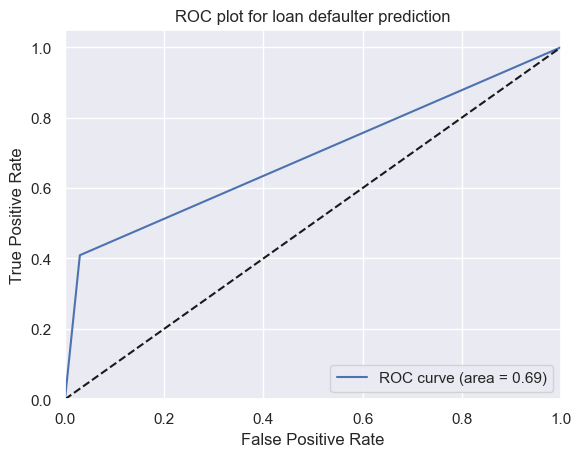

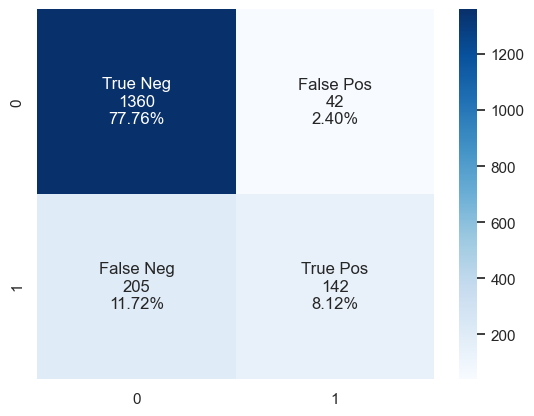

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1402
           1       0.77      0.41      0.53       347

    accuracy                           0.86      1749
   macro avg       0.82      0.69      0.73      1749
weighted avg       0.85      0.86      0.84      1749



In [149]:
# Logistic Regression using above feature set 2
logreg = LogisticRegression()

logreg.fit(x_train2,y_train2)
y_pred2 = logreg.predict(x_test2)


a2 = accuracy_score(y_test2,y_pred2)
f2 = f1_score(y_test2, y_pred2, average="macro")
p2 = precision_score(y_test2, y_pred2, average="macro")
r2 = recall_score(y_test2, y_pred2, average="macro")
print("accuracy score : ",a2)
print("f1 score : ",f2)
print("precision score : ",p2)
print("recall score : ",r2)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_test2, y_pred2)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
model_analysis(logreg,x_test2,y_test2,logreg.predict(x_test2))

## Training the Model using Support Vector Machine (SVM) Method


accuracy score :  0.8513436249285306
f1 score :  0.6793179317931793
precision score :  0.8551206164842529
recall score :  0.6437931403059441


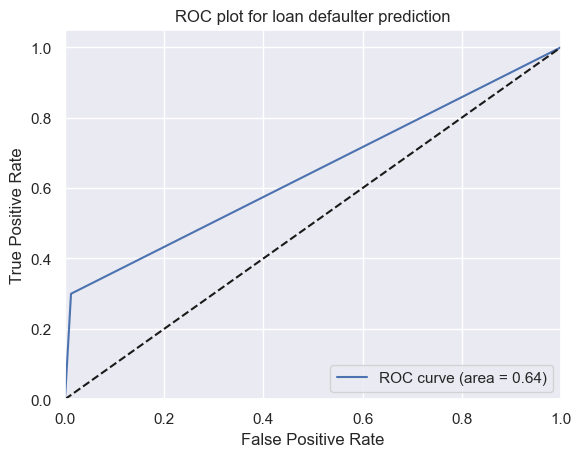

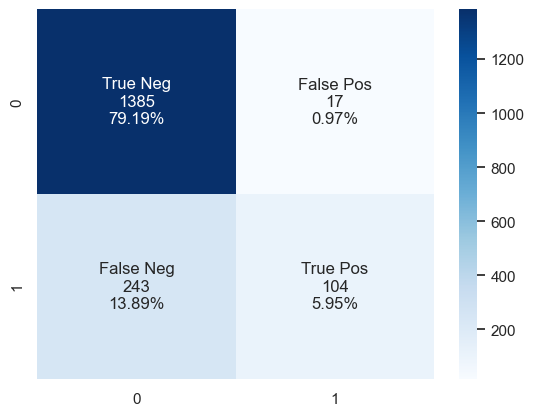

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1402
           1       0.86      0.30      0.44       347

    accuracy                           0.85      1749
   macro avg       0.86      0.64      0.68      1749
weighted avg       0.85      0.85      0.82      1749



In [150]:
# Support vector machine using above feature set 1
clf_svm = svm.SVC(kernel='linear')
#training the support vector machine


# Fit the model to the training data
clf_svm.fit(x_train1, y_train1)


y_pred1 = clf_svm.predict(x_test1)


a3 = accuracy_score(y_test1,y_pred1)
f3 = f1_score(y_test1, y_pred1, average="macro")
p3 = precision_score(y_test1, y_pred1, average="macro")
r3 = recall_score(y_test1, y_pred1, average="macro")
print("accuracy score : ",a3)
print("f1 score : ",f3)
print("precision score : ",p3)
print("recall score : ",r3)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_test1, y_pred1)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
model_analysis(clf_svm,x_test1,y_test1,clf_svm.predict(x_test1))

accuracy score :  0.8536306460834763
f1 score :  0.6876297635791307
precision score :  0.8557676437177781
recall score :  0.6506411178760684


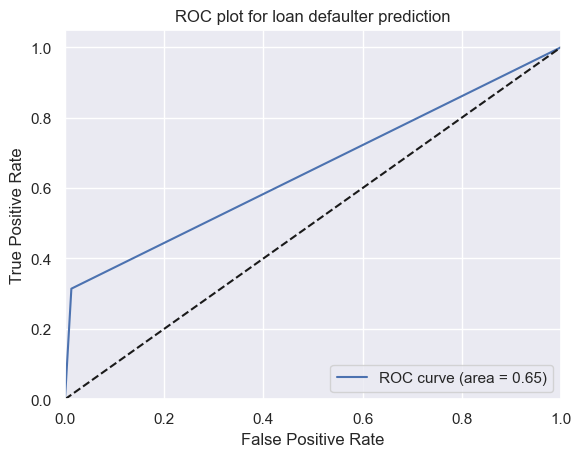

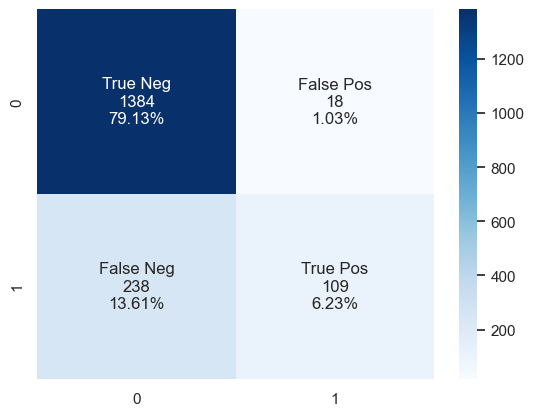

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1402
           1       0.86      0.31      0.46       347

    accuracy                           0.85      1749
   macro avg       0.86      0.65      0.69      1749
weighted avg       0.85      0.85      0.82      1749



In [151]:
# Support vector machine using above feature set 2
clf_svm = svm.SVC(kernel='linear')
#training the support vector machine


# Fit the model to the training data
clf_svm.fit(x_train2, y_train2)


y_pred2 = clf_svm.predict(x_test2)


a4 = accuracy_score(y_test2,y_pred2)
f4 = f1_score(y_test2, y_pred2, average="macro")
p4 = precision_score(y_test2, y_pred2, average="macro")
r4 = recall_score(y_test2, y_pred2, average="macro")
print("accuracy score : ",a4)
print("f1 score : ",f4)
print("precision score : ",p4)
print("recall score : ",r4)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_test2, y_pred2)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
model_analysis(clf_svm,x_test2,y_test2,clf_svm.predict(x_test2))

## Training the Model using Decision Tree Classifier Method

accuracy score :  0.8479130931961121
f1 score :  0.7598817044469217
precision score :  0.7610293660239955
recall score :  0.7587565314269035



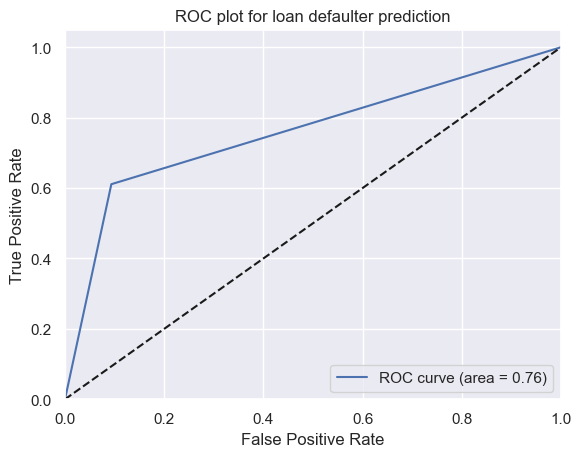

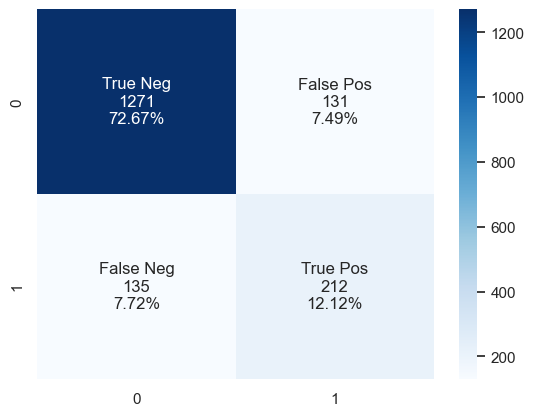

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1402
           1       0.62      0.61      0.61       347

    accuracy                           0.85      1749
   macro avg       0.76      0.76      0.76      1749
weighted avg       0.85      0.85      0.85      1749



In [152]:
# Decision Tree classifier using feat1

clf_tree=DecisionTreeClassifier()
clf_tree.max_depth = 100
clf_tree.fit(x_train1,y_train1)
y_pred1 = clf_tree.predict(x_test1)


a5 = accuracy_score(y_test1,y_pred1)
f5 = f1_score(y_test1, y_pred1, average="macro")
p5 = precision_score(y_test1, y_pred1, average="macro")
r5 = recall_score(y_test1, y_pred1, average="macro")
print("accuracy score : ",a5)
print("f1 score : ",f5)
print("precision score : ",p5)
print("recall score : ",r5)
print("")
# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_test1, y_pred1)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
model_analysis(clf_tree,x_test1,y_test1,clf_tree.predict(x_test1))

accuracy score :  0.8564894225271584
f1 score :  0.7696178218601173
precision score :  0.7756689723828977
recall score :  0.7641060321401703


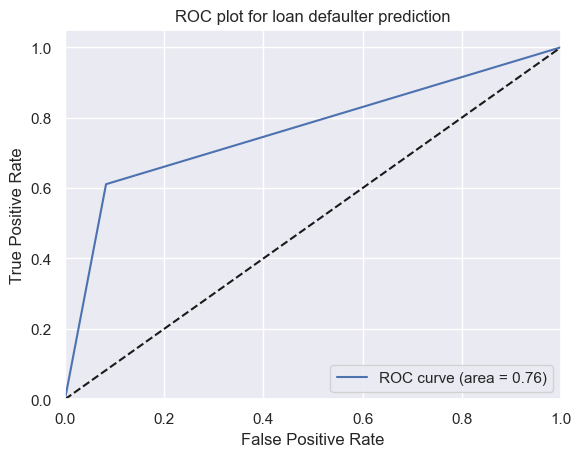

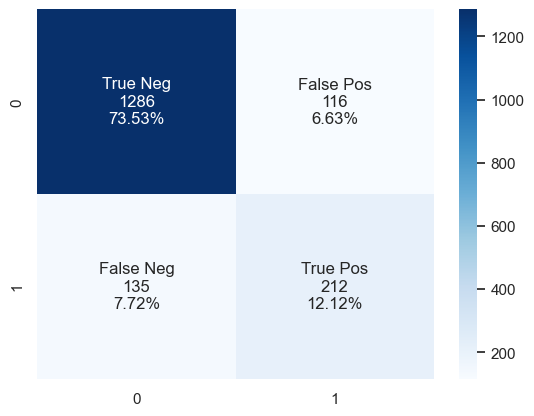

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1402
           1       0.65      0.61      0.63       347

    accuracy                           0.86      1749
   macro avg       0.78      0.76      0.77      1749
weighted avg       0.85      0.86      0.85      1749



In [153]:
# Decision Tree classifier using feat2

clf_tree=DecisionTreeClassifier()
clf_tree.max_depth = 100
#training the support vector machine


# Fit the model to the training data
clf_tree.fit(x_train2, y_train2)


y_pred2 = clf_tree.predict(x_test2)


a6 = accuracy_score(y_test2,y_pred2)
f6 = f1_score(y_test2, y_pred2, average="macro")
p6 = precision_score(y_test2, y_pred2, average="macro")
r6 = recall_score(y_test2, y_pred2, average="macro")
print("accuracy score : ",a6)
print("f1 score : ",f6)
print("precision score : ",p6)
print("recall score : ",r6)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_test2, y_pred2)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
model_analysis(clf_tree,x_test2,y_test2,clf_tree.predict(x_test2))

### Comparing all the models

In [154]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support vector machine','Decision Tree','Logistic Regression', 'Support vector machine','Decision Tree'],
    'Feature Selection ' : ['feat1','feat1','feat1','feat2','feat2','feat2'],
    'Accuracy Score': [a1,a2,a3,a4,a5,a6],
    'Recall Score' : [r1,r2,r3,r4,r5,r6],
    'F1 Score' : [f1,f2,f3,f4,f5,f6],
    'Precision Score' : [p1,p2,p3,p4,p5,p6]
})

In [155]:
models

,Model,Feature Selection,Accuracy Score,Recall Score,F1 Score,Precision Score
0,Logistic Regression,feat1,0.865066,0.695724,0.735132,0.842212
1,Support vector machine,feat1,0.858776,0.689632,0.725795,0.820374
2,Decision Tree,feat1,0.851344,0.643793,0.679318,0.855121
3,Logistic Regression,feat2,0.853631,0.650641,0.687630,0.855768
4,Support vector machine,feat2,0.847913,0.758757,0.759882,0.761029
5,Decision Tree,feat2,0.856489,0.764106,0.769618,0.775669


In [156]:
pd.pivot_table(models,index = ["Feature Selection ","Model"])

Accuracy Score  F1 Score  \
Feature Selection  Model                                              
feat1              Decision Tree                 0.851344  0.679318   
                   Logistic Regression           0.865066  0.735132   
                   Support vector machine        0.858776  0.725795   
feat2              Decision Tree                 0.856489  0.769618   
                   Logistic Regression           0.853631  0.687630   
                   Support vector machine        0.847913  0.759882   

                                           Precision Score  Recall Score  
Feature Selection  Model                                                  
feat1              Decision Tree                  0.855121      0.643793  
                   Logistic Regression            0.842212      0.695724  
                   Support vector machine         0.820374      0.689632  
feat2              Decision Tree                  0.775669      0.764106  
                   Logistic Regression            0.855768      0.650641  
                   Support vector machine         0.761029      0.758757

# Conclusion

Based on the higher accuracy and AUC score achieved by the Regression Model compared to the SVM Model and , I have decided to use the Regression Model for our predictive system.

# Making a Predictive System

# INPUT 1:

In [158]:
#input data 1
input_data1 = (22000,18.0,0,0,201.866667,1,32.352047,0,0)

In [159]:
#changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data1)

In [160]:
#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [161]:
prediction = logreg.predict(input_data_reshaped)
print(prediction)

[0]


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [162]:
#output display for user
if prediction[0] == 0:
    print('The person is not Default')
else:
    print('The person is  Default')

The person is not Default


# INPUT 2

In [163]:
### input data 2
input_data2 = (33200,21.0,0,0,177.247554,0,38.98121,0,0)

In [164]:
#changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data2)

In [165]:
#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [166]:
prediction = logreg.predict(input_data_reshaped)
print(prediction)

[0]


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [167]:
#output display for user
if prediction[0] == 0:
    print('The person is not Default')
else:
    print('The person is  Default')

The person is not Default
